## Pythonによる探索的データ分析

ここでは、数値予測問題を念頭において、目的変数に関係する説明変数や、
追加すべき説明変数の候補をデータ分析で探索していきます。

この過程を探索的データ分析といいます。

この分析を丁寧に行うことで、数値予測モデルの精度が向上するため重要なプロセスです。

データとして、医療費データ(insurance.csv)を用います。

目的変数は医療費"charges"変数とします。

説明変数はその他のすべての列（変数です）。

次の順番で調べてみます。

1. データの確認：データの大きさ、変数の数、行数、各変数の型を調べる。
2. 欠損値・異常値の確認：欠損値・異常値がないかどうか。あった場合、該当データの削除か補間。
3. 変数の統計と分布：各列の変数の統計量と分布を計算します。
4. 相関関係：変数間の関係、特に目的変数と説明変数の関係。


### 学籍番号、氏名を入力せよ

- 学籍番号：
- 氏名:

---

## 0.準備

- pandas,matplotlib.pyplot,seaborn,scipy.statsをimportします。短縮名はpd,plt,sns,statsとします。





#### 問題0:必要なライブラリをimportせよ。


In [1]:
#0
#分析に必要なライブラリ、モジュールをimport
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### ヒント

       import pandas as pd
       import matplotlib.pyplot as plt
       import seaborn as sns
       import scipy.stats as stats

を実行します。


- データの入力です。insurance.csvをWEBサイト(github)からDLしてデータフレームdfに入力します。sex,smoker,regionはカテゴリ型に指定します。

次のセルを実行しましょう。

In [2]:
#WEB上のcsvデータを読み込んでデータフレームとする。
import pandas as pd
import urllib.request
from io import StringIO
#WEB上のデータのURLを指定
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
#データを読み込む関数を定義
def read_csv(url):
    print(url)
    res = urllib.request.urlopen(url)
    res = res.read().decode("utf-8")
    df = pd.read_csv(StringIO(res))
    return df
df=read_csv(url)
df= df.astype({"sex":"category","smoker":"category","region":"category"})

https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv


#### 問題1:(1)データの先頭と(2)後ろの5行を表示してみましょう。


In [3]:
#問題1(1)
#dfの最初の5行を表示
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#問題1(2)
#dfの最後の5行を表示
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


#### ヒント

    df.head(5)
    df.tail(5)

とするのでした。

## 1.　データの確認

データの確認では、データの大きさ、変数の数、行数、各変数の型を調べます。


#### 問題２



(1)医療費データの列数、行数、データサイズを調べ、変数ncol,nrow,sizeに入力し、表示せよ。


In [5]:
#問題2(1)
#医療費データの列数、行数、データサイズを調べ、変数ncol,nrow,sizeに入力し、表示せよ。
size=df.size
ncol=df.shape[1]
nrow=df.shape[0]
print(ncol,nrow,size)

7 1338 9366



#### 問題2(2)各変数の型を調べて表示せよ。


In [6]:
#問題2(2)
#各変数の型を調べて表示せよ。
print(df.dtypes)

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


#### ヒント
(1)
    size=df.size
    ncol=df.shape[1]
    nrow=df.shape[0]
    print(ncol,nrow,size)

(2)
    print(df.dtypes)

を実行します。

## 欠損値の確認

データ分析では、前処理という分析を行う前にデータのクリーニングを行います。
異常値や欠損値がないかどうか、あった場合、該当データを適当な値で補間するか削除します。
この作業を行うことで、データの質を上げることができ、データ分析の精度が
向上します。データ分析は前処理が8割と言われるほど、大事な工程です。

まずはデータの欠損の確認を行います。
なぜ欠損を確認しないといけないのかの代表的な理由は以下となります。

    1. 統計的処理が不可能になる.関数やメソッドが機能しない。
    2. １．の結果、データ資源が無駄になる
    3. 予測モデル作成時に欠損値が不都合になる

データの欠損確認はisnullを用いて、DataFrameの要素で値が欠損していればTrue、欠損していなければFalseを返します。


#### 問題3:(1)欠損値を確認せよ


In [7]:
#問題3(1)
#欠損値の確認
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


#### ヒント

     df.sinul()

を実行します。


データのすべての成分でisnullを計算し、欠損していなければFalseとなります。

このままでは、どこかに欠損(True)があったかもしれないので、和を計算してみます。

True=1,False=0として計算するので、0でなければどこかに欠損値があったことになります。




#### 問題3:(2)各変数ごとに欠損値の個数を確認せよ



In [8]:
#問題3(2)
#欠損値の確認2
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### ヒント

    df.isnull().sum(axis=0)

を実行します。axis=0とすることで列ごとに和を計算します。


すべての列で0になっているので、どの列にも欠損値はないようです。

異常値については、データの値を調べる必要があります。次で確認します。

## 3. 変数の統計

量的な変数の統計量を計算します。質的変数の場合はユニークな要素の比率を確認します。

量的変数の場合は分布を確認します。

pandasには量的データに対して以下の統計量を計算するメソッドがあります。
特に、四分位点と最大値、最小値の5数要約の確認は重要です。


| メソッド名  | 機能  |
|------------|--------|
|  mean()    | 平均値を計算 |
| median()   | 中央値を計算 |
| std(ddof)      | 標準偏差を計算 |
| var(ddof)   |   分散を計算  |
| quantile(p)  | p％点を計算 |
|---------------|-------------|


$$
\mbox{平均値}\overline{x}=\frac{1}{n}\sum_{i=1}^{n}x_i
$$

$$
\mbox{分散}=\frac{1}{n}\sum_{i=1}^{n}(x_i-\overline{x})^2
$$

$$
\mbox{不偏分散}S_x^2=\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\overline{x})^2
$$

ここで、ddofというオプションが分散、標準偏差を計算するvar(),std()にあります。
これは、分母とデータ数$n$との差を指定するものです。分散をデータから推定する場合、不偏分散を用います。その場合、$n$と$n-1$の差は1なので、ddof=1とします。


今回は、データ数が多いこともあり、
気にすることもないですが、データ数が小さい場合で推測統計の計算を行う場合には
注意が必要です。

＊pandasでは不偏分散に対応するddof=1がデフォルトです。

#### 問題4(1)"charges"変数の統計（平均、不偏標準偏差、最大値、最小値、四分位数）を調べよ

In [9]:
#問題4(1)
#"charges"変数の統計（平均、不偏標準偏差、最大値、最小値、四分位数）を調べよ
#printを使わずカンマ区切りで出力してください。
df["charges"].mean(),df["charges"].std(),df["charges"].max(),df["charges"].min(),df["charges"].quantile([0.25,0.5,0.75])

(13270.422265141257,
 12110.011236694001,
 63770.42801,
 1121.8739,
 0.25     4740.287150
 0.50     9382.033000
 0.75    16639.912515
 Name: charges, dtype: float64)

#### ヒント

     df["charges"].mean(),df["charges"].std(),df["charges"].max(),df["charges"].min(),df["charges"].quantile([0.25,0.5,0.75])

を実行してみます。

平均値、標準偏差、最大値、最小値、四分位点を調べることができました。

pandasには各列ごとに平均や標準偏差、最大値、最小値、最頻値などの要約統計量を取得できるdescribe()メソッドがあります。

データの概要を簡単に得ることができる大変便利なメソッドなのでぜひ覚えましょう。

describe()で算出される統計量は以下となります。

|  count| 要素の個数  |
|---------|----------|
|    unique | ユニークな値の要素の個数 |
| top |  最頻値  |
| freq | 最頻値の頻度（出現回数）|
| mean | 算術平均 |
| std  | 標準偏差 |
|   min | 最小値 |
|    max | 最大値 |
|    50%|  中央値 |
|    25%| 1/4分位数 |
|    75%| 3/4分位数 |


医療費データのcharges変数についてdescribe()関数を使ってデータの要約統計量を確認してみましょう。    


#### 問題4(2)describe()でcharges変数の統計を調べよ。

In [10]:
#問題4(2)
#describe()でcharges変数の統計を調べよ。
df["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

#### ヒント

    df["charges"].describe()

を実行しましょう。

医療費の最大値・最小値はありえないほど大きかったり、小さいわけでも、負の値でも
ありません。また、平均が中央値よりかなり大きいので、医療費の分布は右裾が長い
ことがわかります。

これらの結果から、異常値とすぐにわかる異常値はないようです。

他の列の量的変数の確認もしてみます。

データフレーム全体でdescribe()メソッドを適用します。




#### 問題4(3)すべての量的変数の統計を確認せよ`


In [11]:
#問題4(3)
#すべての量的変数の統計を確認せよ
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### ヒント
      df.describe()

を実行します。

age,bmi,childrenの変数も人間として妥当な範囲に収まっています。異常値はない
ようです。

出力結果を見るとsex,smoker,regionなどのカテゴリカル（質的）変数の統計量が算出されていません。
これはpandas側が列のデータ型を判断し、数値型のデータに対してのみ要約統計量を算出しているためです。

全ての列に対して、要約統計量を算出したい場合はdescribe()関数に引数include='all'を渡します。

#### 問題4(4)すべての変数の統計を確認せよ

In [12]:
#問題4(4)
#すべての変数の統計を確認せよ
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


#### ヒント

次を実行してみましょう。

     df.describe(include="all")

カテゴリカル変数の場合、変数のとるユニークな要素の個数と、ある要素のデータ数のみです。

smoker変数の場合、喫煙者(yes)か非喫煙者(no)か、の2個の値をとります。noの人数は1064人なので、yesは1338-1064=274人です。

では、ユニークな要素の割合を計算してみましょう。

#### 問題5 sex,smoker,regionのユニークな要素の比率を計算しなさい。

(1)要素の比率をser1,ser2,ser3に代入し、出力せよ。



In [13]:
#問題5(1)
#要素の比率をseri1,ser2,ser3に入力し出力
ser1=df["sex"].value_counts(normalize=True)
ser2=df["smoker"].value_counts(normalize=True)
ser3=df["region"].value_counts(normalize=True)
print(ser1)
print(ser2)
print(ser3)

male      0.505232
female    0.494768
Name: sex, dtype: float64
no     0.795217
yes    0.204783
Name: smoker, dtype: float64
southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64


#### ヒント

    ser1=df["sex"].value_counts(normalize=True)
    ser2=df["smoker"].value_counts(normalize=True)
    ser3=df["region"].value_counts(normalize=True)
    print(ser1)
    print(ser2)
    print(ser3)

を実行します。

#### 問題5(2)ser1,ser2,ser3を棒グラフとして表示せよ。


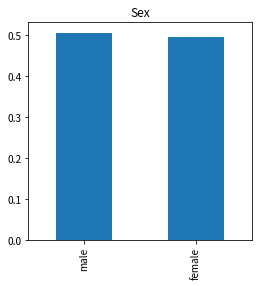

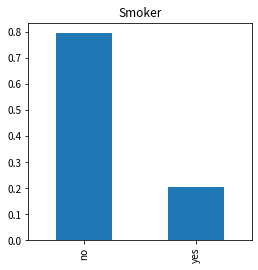

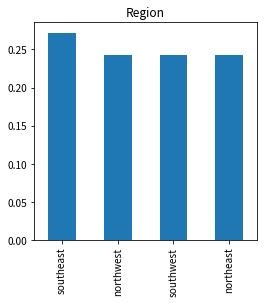

In [14]:
#問題5(2)
#ser1,ser2,ser3を棒グラフとして表示せよ。
ser1.plot.bar(title="Sex",figsize=(4,4))
plt.show()
ser2.plot.bar(title="Smoker",figsize=(4,4))
plt.show()
ser3.plot.bar(title="Region",figsize=(4,4))
plt.show()

#### ヒント

    ser1.plot.bar(title="Sex",figsize=(4,4))
    plt.show()
    ser2.plot.bar(title="Smoker",figsize=(4,4))
    plt.show()
    ser3.plot.bar(title="Region",figsize=(4,4))
    plt.show()

を実行します。

棒グラフを3つ表示しましたが、縦に並んでいてスクロールが必要なため確認が面倒です。

複数の図を横に並べる方法を解説します。



#### 複数の図を表示するには

複数のグラフを作成する際には、figureとaxesという概念を理解しておく必要があります。

figureとaxesは階層構造を持っており、1つのfigureに複数のaxesを配置することができます。イメージとしては、figureはたくさんのグラフを描くための大きなキャンバスであり、axesはキャンバスの中のグラフを描く領域だと捉えてください。





グラフ領域を決めるにはplt.subplots()関数を使用します。このとき、figureオブジェクトとaxesオブジェクトが同時に作成され、それらが戻り値として返ってきます。グラフをプロットするときこれらのオブジェクトの関数を使用するため、一般的には、fig, ax といった名前の変数に格納しておきます。plt.subplots()関数は引数figsizeでサイズを指定できます。



    fig, ax = plt.subplots(行数, 列数, figsize=(W,H))


- subplots()の引数

|    引数	| 説明 |
|-------|-----------|
|    figsize  |	キャンバスのサイズ（横幅W, 高さH） |
|    dpi	| キャンバスの解像度    |
|    facecolor	|キャンバスの背景色   |
|    linewidth	|キャンバスの外枠の太さ  |
|    edgecolor	|キャンバスの枠の色   |


グラフ領域を複数にした場合は、変数axにはaxesオブジェクトの配列が格納されます。特に行数・列数ともに2以上の場合は、2次元配列として格納されることに注意しましょう。

次に、作成したaxesオブジェクトが代入された変数のメソッドを使ってグラフを描画していきます。

- axesオブジェクトのplot()メソッド

|  記法     |グラフの種類          |
|------|--------------|
| axes.plot()    | 折れ線グラフ             |
|  axes.scatter()     | 散布図            |
|  axes.bar()  |  棒グラフ   |
|  axes.barh()  |  横棒グラフ   |
| axes.hist()   |  ヒストグラム   |
| axes.boxplot()   | 箱ひげ図    |
| axes.violinplot()  バイオリンプロット |  
| axes.imshow()   |  画像   |
| axes.axhline()   |  水平線     |
| axes.axvline()   |   垂直線  |



例えば2つのグラフ領域を作成し、それぞれの領域に折れ線グラフを描画する場合は、次のように記述します。

    fig, ax = plt.subplots(1, 2, figsize=(8,4)
    0番目のグラフ領域にグラフを描画: ax[0].plot()  
    1番目のグラフ領域にグラフを描画: ax[1].plot()  

4つのグラフ領域を2×2のグリッドで作成し、それぞれの領域に折れ線グラフを作成する描画は、

    ax[行インデックス, 列インデックス]
    
として対象のグラフ領域を指定します。具体的には次のように記述します。

    fig, ax = plt.subplots(2, 2, figsize=(8,8)
    左上のグラフ領域にグラフを描画: ax[0,0].plot()  
    右上のグラフ領域にグラフを描画: ax[0,1].plot()  
    左下のグラフ領域にグラフを描画: ax[1,0].plot()  
    右下のグラフ領域にグラフを描画: ax[1,1].plot() 



それでは、1つのfigureに、3つの棒グラフを横に並べて描画してみましょう。


#### 問題5 (3)ser1,ser2,ser3の棒グラフを一枚のグラフとして表示せよ。

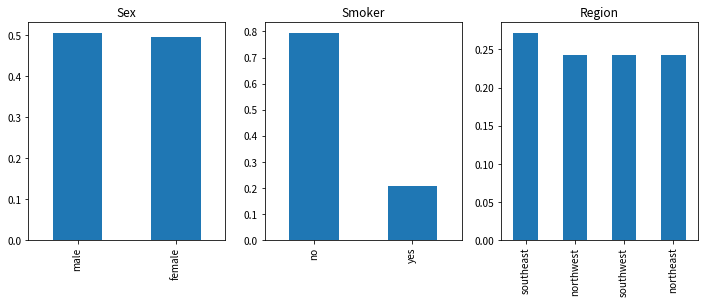

In [15]:
#問題5(3)
#ser1,ser2,ser3の棒グラフを一枚のグラフとして表示せよ。
#figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(1, 3, figsize=(12,4))
#グラフの作成
ser1.plot.bar(ax=ax[0])
ax[0].set_title("Sex")
ser2.plot.bar(ax=ax[1])
ax[1].set_title("Smoker")
ser3.plot.bar(ax=ax[2])
ax[2].set_title("Region")
#グラフの表示
plt.show()

#### ヒント

    fig, ax = plt.subplots(1, 3, figsize=(12,4))
    #グラフの作成
    ser1.plot.bar(ax=ax[0])
    ax[0].set_title("Sex")
    ser2.plot.bar(ax=ax[1])
    ax[1].set_title("Smoker")
    ser3.plot.bar(ax=ax[2])
    ax[2].set_title("Region")

を実行します。


#### 問題6 age,bmi,children,chargesの4つのヒストグラムをプロットせよ。

- 4つのヒストグラムを横に並べる。

- ヒストグラムのプロットにはaxesのhist()メソッドを用いること。

- childrenは子供の数の比率を求め棒グラフとする

- ヒストグラムの階級の数(bins)は20とする。


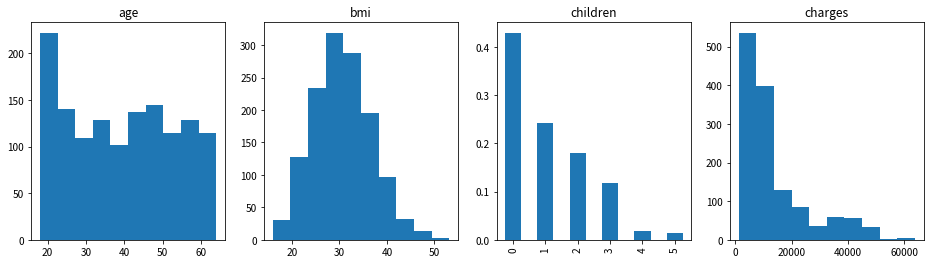

In [16]:
#問題6
#figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(1,4, figsize=(16,4))
#グラフの作成
ax[0].hist(df["age"])
ax[0].set_title("age")
ax[1].hist(df["bmi"])
ax[1].set_title("bmi")
ser=df["children"].value_counts(normalize=True)
ser.plot.bar(ax=ax[2])
ax[2].set_title("children")
ax[3].hist(df["charges"])
ax[3].set_title("charges")
#グラフの表示
plt.show()

#### ヒント

    fig, ax = plt.subplots(1, 4, figsize=(16,4))
    #グラフの作成
    ax[0].hist(df["age"])
    ax[0].set_title("age")
    ax[1].hist(df["bmi"])
    ax[1].set_title("bmi")
    ser=df["children"].value_counts(normalize=True)
    ser.plot.bar(ax=ax[2])
    ax[2].set_title("children")
    ax[3].hist(df["charges"])
    ax[3].set_title("charges")

を実行します。

## 4. 相関関係

数値予測問題では、目的変数を$y$、説明変数を$p$次元ベクトル$\vec{x}=(x_1,\cdots,x_p)$と書くと、
$$
y=f(\vec{x})=f(x_1,\cdots,x_p)+\epsilon
$$
の関数$f()$と誤差$\epsilon$の確率法則を推定します。

$\epsilon$はこのモデルでは説明できない要因の寄与を表していて、
小さいほどモデルは予測精度が高いことを意味します。


$f()$を推定するためには、$\vec{x}$と$y$の相関関係を理解することが重要です。
また、モデル化では説明変数間の関係も重要です。相関係数があまりにも高い
説明変数のペアがある場合、関数$f()$の推定での誤差が大きくなります。

変数間の関係を確認するには、

1.量的変数同士なら散布図、線形の相関関係なら相関係数を評価

2.質的変数同士ならクロス集計し、その上で相関係数（ファイ係数など）を計算

3.量的変数と質的変数の場合、質的変数で層別化（グループ分け）して平均値の差を評価

を実行します。

具体的にすすめていきます。




### 4.1 量的変数間の相関関係

age,bmi,children,chargesの各ペアの散布図をプロットします。

#### 問題7(1)age変数とcharges変数の散布図をプロットせよ



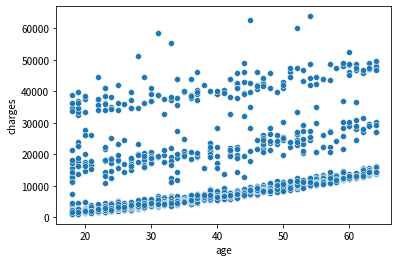

In [17]:
#問題7(1)
#ageとchargesの散布図をプロット
sns.scatterplot(data=df,x="age",y="charges")
plt.show()

#### ヒント

ペアごとにプロットする場合は、seabornのscatterplotを用います。

 
        sns.scatterplot(data=df,x="age",y="charges")
        plt.show()

を実行してみます。

#### 問題7(2)(1)の散布図の周辺に各変数のヒストグラムをプロットせよ


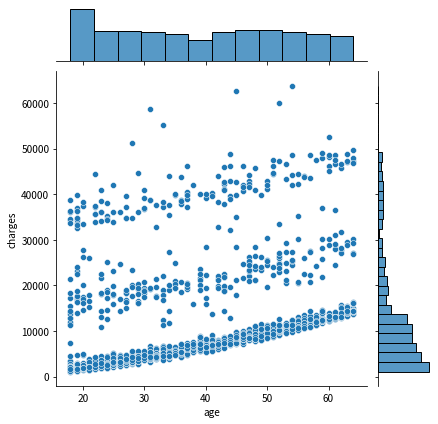

In [18]:
#問題7(2)
#ageとbmiの散布図の周辺に各変数のヒストグラムをプロット
sns.jointplot(data=df,x="age",y="charges")
plt.show()

#### ヒント

散布図にヒストグラムを追加する場合、seabornのjointplotを用います。

       sns.jointplot(data=df,x="age",y="charges")
       plt.show()

を実行してみます。



#### 問題7(3)医療費データの量的変数の散布図行列をプロットせよ。


複数の量的変数のすべての組み合わせの散布図を行列表示したものを散布図行列と呼びます。seabornのpairplot()を用います。

-  hueで指定したカテゴリカル変数でグループ分けして表示します

-  kind="reg"を指定すると回帰直線もプロットします。

-  対角線上にヒストグラムを表示します。diag_kind="kde"とするとカーネル密度推定の結果をプロットします


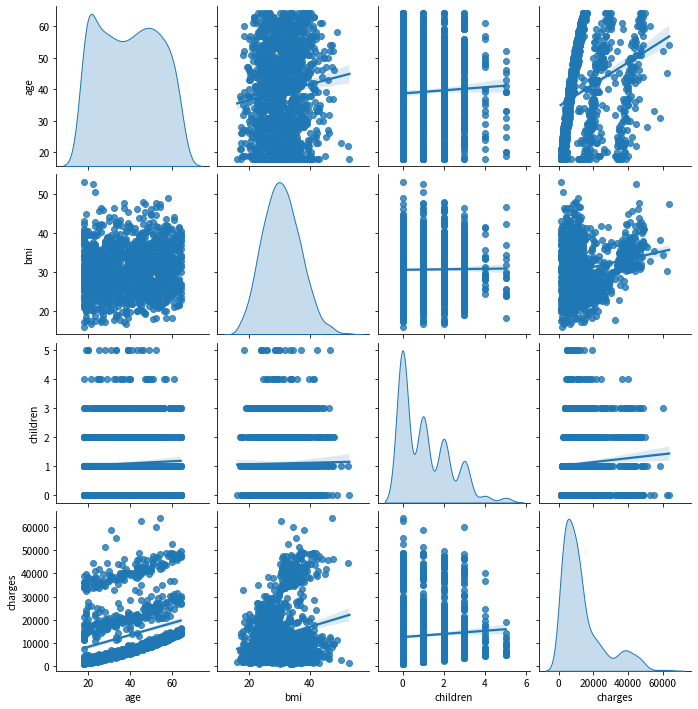

In [19]:
#問題7(3)
#医療費データの量的変数の散布図行列
sns.pairplot(data=df,kind="reg",diag_kind="kde")
plt.show()

#### ヒント


      sns.pairplot(data=df,kind="reg",diag_kind="kde")
      plt.show()

を実行してみます。

回帰直線の傾きが右上がりなら正の相関、右上がりなら負の相関関係を表しますが、ageとcharges、bmiとcharges、ageとbmiには弱い正の相関関係があるようです。

では、量的変数のすべてのペアの相関係数を計算します。散布行列のように相関係数を
行列に並べたものを相関係数行列といいます。

    df.corr()

を実行します。

#### 問題8(1) 医療費データの量的変数の相関係数行列を計算せよ

In [20]:
#問題8(1)
#相関係数行列の計算
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


相関係数行列からも、ageとcharges,bmiとcharges,ageとbmiに弱い正の相関があることがわかります。

対角成分は、変数自身の相関係数なので1になります。


---


今の場合、変数は4個なので、相関係数行列の各要素を確認して相関関係が大きい変数ペアを確認することが可能でした。

一方、変数が多くなってくると、そうした確認は難しくなってきます。
また、相関係数の傾向などを知りたい場合、相関係数を可視化することが重要です。

一般に、行列型の量的データを確認する場合、ヒートマップを用いることが多いです。
行列を2次元平面で表し数値の大小を色の違いで表します。

相関係数行列をヒートマップでプロットしてみます。



#### ヒートマップ

seabornでヒートマップを作成する場合は、sns.heatmap()関数を使用します。ヒートマップは表形式のデータを可視化したものなので、関数に渡すデータは2次元配列の形式にする必要があります。

    sns.heatmap(data=2次元配列が代入された変数)

その他の主な引数には以下のようなものがあります。

|    引数	| 説明  |
|----------|------------|
|    vmin, vmax	|最小値、最大値  |
|    robust  |	最小値、最大値の指定がない場合、Trueを指定すると極端な値の影響を受けないよう調整  |
|    annot	|Trueを指定するとセルに値を出力  |
|    fmt |	セルの値を出力する場合、フォーマットを指定（整数="d", 小数点以下2桁=".2f" 等）|
|    cmap	| カラーマップ  |
|    cbar	| Falseを指定するとカラーバーを非表示 |
|    ax	| グラフを描画したい領域（axesオブジェト）|




#### 問題8(2) (1)の相関係数行列をヒートマップで可視化せよ

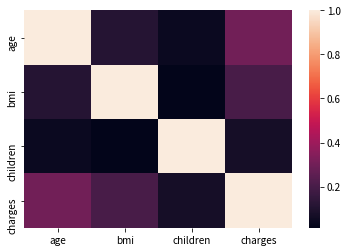

In [21]:
#問題8(2)
#相関係数行列のヒートマップでの可視化
sns.heatmap(df.corr())
plt.show()

#### ヒント
     sns.heatmap(df.corr())
     plt.show()


### 参考：共分散と相関係数

- 共分散

共分散(covariance)は二つの連続型の変数の関係性を見るときに使われる統計量です。

$$
\mbox{Cov}(\vec{x},\vec{y})=\frac{1}{N}\sum_{i=1}^{N}
(x_i-\overline{x})(y_i-\overline{y})
$$

同じ変数同士の共分散は分散です。

$$
\mbox{Cov}(\vec{x},\vec{x})=\frac{1}{N}\sum_{i=1}^{N}(x_i-\overline{x})^{2}=S_x^2
$$




共分散の数式は、共分散が正なら、「片方の変数が平均よりも大きいなら、もう一方の変数もその平均よりも大きい」と期待できると解釈できます。共分散が負のときも同様に解釈できます。

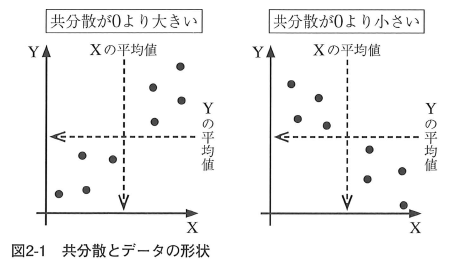

標本分散、不偏分散と同じく、分母が$N$,$N-1$の場合を標本共分散、不偏共分散と呼びます。

不偏共分散

$$
\mbox{Cov}(\vec{x},\vec{y})=\frac{1}{N-1}\sum_{i=1}^{N}
(x_i-\overline{x})(y_i-\overline{y})
$$

- 分散共分散行列

分散共分散行列とは複数の変数において、分散と共分散の一覧を行列の形式でまとめたものです。変数$x,y$の分散共分散行列は

$$
\mbox{Cov}(x,y)=\left(
\begin{array}{cc}
S_x^2  & \mbox{Cov}(\vec{x},\vec{y})  \\
\mbox{Cov}(\vec{x},\vec{y}) & S_y^2
\end{array}
\right)
$$

ここで、$S_x^2,S_y^2$は変数$x,y$の分散です。







- ピアソンの積率相関係数

相関係数$\rho$は共分散をデータの標準偏差の積で割ったものです。

$$
\rho=\frac{\mbox{Cov}(\vec{x},\vec{y})}{S_x S_y}
=\frac{\mbox{Cov}(\vec{x},\vec{y})}{\sqrt{S_x^2 S_y^2}}
$$




割り算しているため、分子・分母の共分散・分散を標本共分散・標本分散を用いても不偏共分散・不偏分散を用いても同じになります。また、絶対値は最大でも1です。

$$
-1\leqq \rho \leqq 1
$$



- 相関行列

分散共分散行列と同じように相関係数を行列で並べたものです。
変数$x,y$の相関行列は次のようになります。
$$
\mbox{Corr}(\vec{x},\vec{y})=\left(
\begin{array}{cc}
1 & \rho_{xy} \\
\rho_{xy} & 1
\end{array}
\right)
$$
対角成分は変数自身との相関係数なので1となります。


- 相関が役に立たないとき

相関係数は複数の変数間に線形な関係があるかどうかを見るためのものです。そのため、非線形な関係については分かりません。データに関係があるかないかは、まず散布図などを描くなどして関係性を可視化することが大事です。

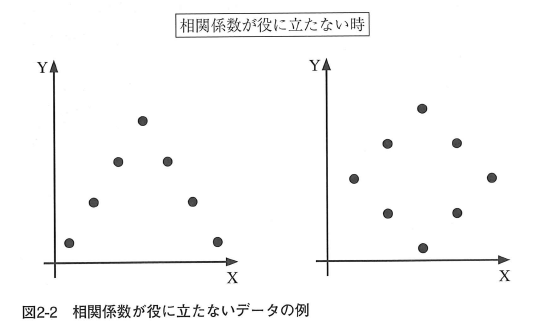

### 4.2 質的変数間の相関関係

sex,smoker,regionが質的変数でした。

目的変数はchargesで量的変数なので、これらの質的変数間の関係は
直接的には関係ありませんが調べてみます。

質的変数間の関係、特に質的変数の要素の組み合わせの特徴を調べる
場合、クロス集計表を作成します。




### クロス集計表（分割表）

弘前・青森・五所川原に3店舗を展開する靴店の売上データがあったとします。もともとのデータはPOSデータで、各店舗での
販売時点での記録です。POSは「Point Of sales」という英語の頭文字を取ったものです。POSデータでは販売時刻、商品情報（商品コード）、値段、数量、などの様々なデータを含みますが、それを集計したものが次の表だったとします。

1列目がお店の種類、2列目が靴の色、3列目が売れた個数になっています。

$$
\begin{array}{|c|c|c|}
\hline
\mbox{お店} & \mbox{靴の色}  & \mbox{売れた個数}　\\
\hline
弘前店 & 青 & 13 \\
\hline
弘前店 & 赤 & 6 \\
\hline
青森店 & 青 & 10 \\
\hline
青森店 & 赤 & 15 \\
\hline
五所川原 & 青 & 20 \\
\hline
五所川原 & 赤 & 5 \\
\hline
\end{array}
$$

これを店舗と色の組み合わせで集計してみます。

$$
\begin{array}{|c|c|c|}
\hline
 & \mbox{青}  & \mbox{赤}　\\
\hline
弘前店 & 13 & 6 \\
\hline
青森店 & 10 & 15 \\
\hline
五所川原 & 20 & 5 \\
\hline
\end{array}
$$


このようなデータの形式をクロス集計と呼びます。





- クロス集計表の作成

POSデータを集計してクロス集計表に変換してみます。

4月の30日間に1000人がランダムに青森、弘前、五所川原の店舗を訪れ（確率0.3,0.5,0.2）、黒か白か青か赤の靴をランダム(確率0.5,0.3,0.1,0.1)に買うとします。

1人の顧客が買う個数は平均0.5のポアソン分布に従う乱数+1とします。

売上は売れた個数×1000円とします。セールスなどを加味して、もうすこしリアルにしてもよいですが。以上の4つの変数でデータフレームを作成します。

データの作成法に興味がある場合、次のセルのプログラムを解読してください。



次のセルのプログラムを実行してください。

出来上がったデータフレーム名はshoes_salesです。

1000行5列のデータフレームで、変数はdate（日付）,store（店舗名）,color（靴の色）,sale（売れた数）,money（金額）です。

In [22]:
# POSデータ生成
import numpy as np
np.random.seed(1)
from datetime import date,timedelta
colors=np.random.choice(["黒","白","青","赤"],1000,p=[0.5,0.3,0.1,0.1])
print(pd.DataFrame(colors).value_counts())
stores=np.random.choice(["弘前店","青森店","五所川原店"],1000,p=[0.5,0.3,0.2])
print(pd.DataFrame(stores).value_counts())
sales=np.random.poisson(size=1000,lam=0.1)+1
print(np.mean(sales))
money=1000*sales
dates=pd.date_range(date(2023,4,1), periods=30)
r_dates=np.random.choice(dates,1000)
r_dates=np.sort(r_dates)
shoes_sales=pd.DataFrame({"date":r_dates,"store":stores,"color":colors,"sale":sales,"money":money})
print(shoes_sales.head())

黒    494
白    310
赤    102
青     94
dtype: int64
弘前店      471
青森店      292
五所川原店    237
dtype: int64
1.085
        date  store color  sale  money
0 2023-04-01    弘前店     黒     1   1000
1 2023-04-01  五所川原店     白     1   1000
2 2023-04-01    青森店     黒     1   1000
3 2023-04-01    青森店     黒     1   1000
4 2023-04-01    弘前店     黒     1   1000


クロス集計表を作成するには、pandasのpivot_table()関数を用います。

     pivot_table(data,values,aggfun,index,columns)


- dataにデータフレームの指定
- valuesに集計対象
- aggfuncに集計に用いる関数(和、平均、など)
- index,columnsはクロス集計表の行と列の指定です。

storeを行、colorを列、データをsalesの集計としたクロス集計表の作成にはdataをデータフレームsample_dfに、valuesを"sales",にaggfuncを"sum"に、indexを"store"に、columnsを"color"にします。

クロス集計表を作成してみましょう。

#### 問題9(1) 各店舗ごとに、各色の売上数を集計します。indexにstore, columnsにcolor,valuesにsaleを指定し、aggfuncをsumとします。


In [23]:
#問題9(1)
#各店舗ごとに、各色の売上数をクロス集計
cross=pd.pivot_table(data=shoes_sales,values="sale",aggfunc="sum",index="store",columns="color")
print(cross)

color    白   赤   青    黒
store                  
五所川原店   75  34  26  122
弘前店    154  52  43  260
青森店    109  24  26  160


#### ヒント

    cross = pd.pivot_table(data = shoes,values = "sale",aggfunc = "sum",index = "store",columns = "color")

を実行します。


4月の日毎の売上を集計する場合、indexにdateを指定し、columnsは指定せず、valuesは
money,aggfuncはsumとします。


#### 問題9(2) 4月の日毎の売上を集計せよ。

In [24]:
#問題9(2)
#日毎の売上を集計
pd.pivot_table(data=shoes_sales,values="money",aggfunc="sum",index="date").head()

,money
date,
2023-04-01,40000
2023-04-02,26000
2023-04-03,34000
2023-04-04,31000
2023-04-05,38000


#### ヒント

    pd.pivot_table(data = shoes,values = "money",aggfunc = "sum",index = "date"）.head()

を実行します。


#### 独立性の検定

クロス集計の結果を用いて、質的変数（カテゴリカル変数）間の相関関係を分析することになります。靴のPOSデータの場合、storeとcolorの間に相関を調べることは店舗によって売れる靴の色に違いがあるのか、を検討することと同じです。上で用いたデータでは、storeもランダム、colorもランダムに選んでいるので、相関はないことになります。この場合、storeとcolorは"独立"であるといいます。

質的変数のペアが独立かどうかを調べるには、カイスクエア検定の「独立性の検定」を
用います。独立性の検定では、クロス集計の結果を用いて、質的変数の要素の出現確率を計算し、質的変数の組み合わせが実現する確率は”独立性”の仮定から、各質的変数の要素の出現確率の積であるとします。全データ数をかけると、質的変数の要素の組み合わせが実現する回数（度数）が評価できます。これを期待度数といいます。また、クロス集計表から要素の組み合わせの度数がわかります。この度数を実現値といいます。そして、期待度数と実現値の乖離度をカイスクエア$\chi^2$で計測します。

質的変数が独立な場合、カイスクエアは$\chi^2$(カイスクエア)分布に従います。$\chi^2$分布の自由度は行数を$r$,列数を$c$とすると$(r-1)(c-1)$で計算します。カイスクエアが$\chi^2$分布で普通に実現する範囲なら”独立性”の仮定が正しい証拠です。
一方、カイスクエア（＝期待度数と実現値の乖離）が$\chi^2$分布の視点で大きすぎる値だとと、”独立性”の仮定が誤っていると判断します。

そのため、乖離が大きいかどうかは、その乖離が実現する確率（p値,p-value)をカイスクエア分布を用いて計算します。p値があまりにも小さければ「乖離がありえないほど大きい」とします。

もちろん、統計的仮説検定なので、結論は統計的なものであって、確実なものでは
ありません。あくまで判断のための証拠のひとつです。







検定を実行します。独立性の検定ではscipy.statsモジュールのchi2_contingency()関数を使います。補正をいれずに計算したいのでcorrection=Falseとします。


#### 問題10 店舗ごとに売れる靴の色の傾向に差があるかどうかを検定せよ

In [25]:
#問題10
#各店舗ごとに、各色の売上数をクロス集計
cross=pd.pivot_table(data=shoes_sales,values="sale",aggfunc="sum",index="store",columns="color")
#独立性の検定
import scipy.stats as stats
stats.chi2_contingency(cross,correction=False)

Chi2ContingencyResult(statistic=7.141632867622562, pvalue=0.3079475614018201, dof=6, expected_freq=array([[ 80.06082949,  26.05529954,  22.50230415, 128.38156682],
       [158.5640553 ,  51.60368664,  44.56682028, 254.26543779],
       [ 99.37511521,  32.34101382,  27.93087558, 159.35299539]]))

#### ヒント

      import scipy.stats as stats
      stats.chi2_contingency(cross,correction=False)

を実行します。

分析結果を解説します。

- statisticsはカイスクエアの値、つまり、実現値と理論値の乖離度合いです。

- pvalueがp値で約0.31.つまり、この程度の乖離が実現する確率は30%を超えているので、確率的には十分ありえます。

- dof(degree of freedom)はカイスクエア(statistics)が従うカイスクエア分布の自由度です。

- expected frequencyは期待度数です。3行4列の2次元構造になっていることがわかります。

- $(r-1)(c-1)=6$なのでdof=6となっています。

------

### 4.2 質的変数間の相関の確認（続き）

では、医療費データの分析に戻ります。質的変数はsex,smoker,regionでした。これらの変数のとる値の組み合わせに相関はあるのでしょうか？

#### 問題11(1)Sex vs Smoker, Region vs Sex, Region vs Smokerでデータ数を集計せよ。


変数は3つあるので、組み合わせは3通りです。3個のクロス集計表を作成し、独立性の検定を行います。


- 注意：クロス集計では行に原因となる質的変数、列に結果となる質的変数を選ぶのが普通です。独立性の検定では行と列の選び方で結論は変わりませんが、分析結果を解釈する
場合、行と列の選択は重要です。ここでは、性別の差が喫煙率に違いを生むのか、地域差が性別の比率や喫煙率の差に相関があるのか、の観点で行と列を選ぶことにします。



In [26]:
#問題11(1)
#クロス集計表の作成
cross_sex_vs_smoker=pd.pivot_table(data=df,values="age",aggfunc="count",index="sex",columns="smoker")
cross_region_vs_sex=pd.pivot_table(data=df,values="age",aggfunc="count",index="region",columns="sex")
cross_region_vs_smoker=pd.pivot_table(data=df,values="age",aggfunc="count",index="region",columns="smoker")
#表示
print(cross_sex_vs_smoker,cross_region_vs_sex,cross_region_vs_smoker)

smoker   no  yes
sex             
female  547  115
male    517  159 sex        female  male
region                 
northeast     161   163
northwest     164   161
southeast     175   189
southwest     162   163 smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


#### ヒント

      cross_sex_vs_smoker=pd.pivot_table(data=df,values="age",aggfunc="count",index="sex",columns="smoker")
      cross_region_vs_sex=pd.pivot_table(data=df,values="age",aggfunc="count", index="region",columns="sex")
      cross_region_vs_smoker=pd.pivot_table(data=df,values="age",aggfunc="count",index="region",columns="smoker")

を実行します。

#### 問題11(2)(3)(4)Sex vs Smoker, Region vs Sex, Region vs Smokerで独立性の検定を行え

独立性の検定では、scipy.statsモジュールのchi2_coningency()を使います。

- Sex vs Smokerで独立性の検定を実行します。

In [27]:
#問題11(2)
#独立性の検定1(sex vs smoker)
stats.chi2_contingency(cross_sex_vs_smoker,correction=False)

Chi2ContingencyResult(statistic=7.765921028604452, pvalue=0.005324114164320537, dof=1, expected_freq=array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]]))

性別と喫煙率の間に相関があるようです。カイスクエアの値は$\chi^2$分布の観点では大きく、p値は1%未満ですので、この結果が得られる確率は十分小さく、性別ごとの喫煙率の差は有意な差であると判断します。

- Region vs Sexで独立性の検定を実行します。

In [28]:
#問題11(3)
#独立性の検定2(region vs sex)
stats.chi2_contingency(cross_region_vs_sex,correction=False)

Chi2ContingencyResult(statistic=0.43513679354327284, pvalue=0.9328921288772233, dof=3, expected_freq=array([[160.30493274, 163.69506726],
       [160.79970105, 164.20029895],
       [180.09566517, 183.90433483],
       [160.79970105, 164.20029895]]))


地域と性別の比率の間に相関はないようです。カイスクエアの値は$\chi^2$分布の観点では小さく、p値は93%以上ですので、この結果が得られる確率は十分大きく、地域ごとの性別の比率の差は有意な差ではないと判断します。

- Sex vs Smokerで独立性の検定を実行します。


In [29]:
#問題11(4)
#独立性の検定3(region vs smoker)
stats.chi2_contingency(cross_region_vs_smoker,correction=False)

Chi2ContingencyResult(statistic=7.343477761407071, pvalue=0.06171954839170541, dof=3, expected_freq=array([[257.65022422,  66.34977578],
       [258.44544096,  66.55455904],
       [289.45889387,  74.54110613],
       [258.44544096,  66.55455904]]))

地域と喫煙率の間に相関はないようですが、p値が約6\%なので、今後の分析で結論は変わるかもしれません。とりあえず、このデータでは相関はないと判断します。

このように、p値を計算し、5\%,1\%といった基準値より小さいかどうかで判断をします。
5\%,1%のことを有意水準と呼びます。有意差を判断する基準だからです。

### 4.3 質的変数と量的変数の相関関係

質的変数と量的変数の相関関係を分析する場合、質的変数の各要素ごとにデータを分割し（層別化）、量的変数の平均値を求めて、平均値が質的変数の値と相関があるのかどうかを調べます。

ここでは、量的変数である目的変数chargesと質的変数sex,smoker,regionに相関があるかどうかを調べることにします。

まずは、データフレームの"charge"変数を質的変数で層別化（グループ分け）します。

性別の場合から分析を始めます。

    df.groupby(by="sex")["charges"].describe()

を実行します。

#### 問題12(1)性別ごとの医療費の統計を調べよ。

In [30]:
#問題12(1)
# 性別ごとの医療費の統計
df.groupby(by="sex")["charges"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


中央値(50%)にほとんど差はないですが、第3四分位点(75%)は男性が大きいです。その結果、男性の医療費の平均値も大きくなっているようです。

バイオリンプロットで、性別ごとの医療費の分布を確認します。

      sns.violinplot(data=df,x="sex",y="charges")
      plt.show()

を実行します。

#### 問題12(2)性別毎の医療費のバイオリンプロットをプロットせよ

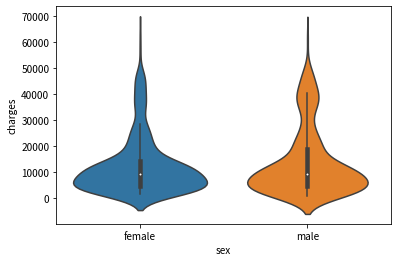

In [31]:
#問題12(2)
# 性別毎の医療費のバイオリンプロット
sns.violinplot(x="sex",y="charges",data=df)
plt.show()

バイオリンプロットでは、真ん中の長方形で四分位点を示しています。中央値の白丸はそれほど差がないようです。医療費が高いところで男性の分布が厚くなっているのがわかります。

他の、質的変数でも確認してみます。


#### 問題13:喫煙習慣での医療費の違いを(1)統計量と(2)バイオリンプロットで確認せよ

In [32]:
#問題13(1)
# 喫煙習慣ごとの医療費の統計
df.groupby(by="smoker")["charges"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


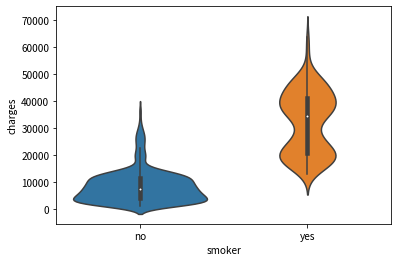

In [33]:
#問題13(2)
# 喫煙習慣ごとの医療費のバイオリンプロット
sns.violinplot(x="smoker",y="charges",data=df)
plt.show()

喫煙習慣のあるなしでは、顕著に医療費の平均値に差があることがわかります。
ただ、バイオリンプロットを見る限り、喫煙習慣だけで医療費の分布が異なるのとは別の
要因もあるようです。喫煙習慣だけなら、分布のピークはひとつで、その位置が
喫煙習慣のあるなしで移動すると思われますが、分布にはピークが２つあります。
特に、喫煙習慣あり(yes)では、医療費が高い側に大きな分布のピークがあります。

最後に医療費の地域差を調べてみます。



### 問題13:地域ごとの医療費の違いを(3)統計量と(4)バイオリンプロットで確認せよ

In [34]:
#問題13(3)
# 地域ごとの医療費の統計
df.groupby(by="region")["charges"].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


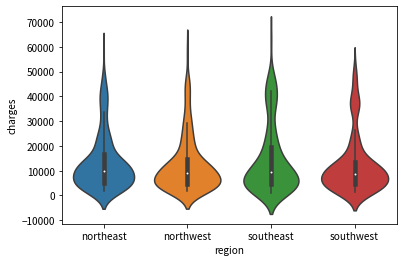

In [35]:
#問題13(4)
# 地域ごとの医療費のバイオリンプロット
sns.violinplot(x="region",y="charges",data=df)
plt.show()

医療費の分布は右裾が厚いのは共通していますが、どの地域でも医療費の高いところにピークがあるようです。特に、southeast地域は平均値が高く、医療費の高いところのピークも大きいことが確認できます。

#### 母平均の差の検定

異なるグループで平均値に差があるかどうかを統計分析することを母平均の差の検定といいます。グループの個数、つまり、質的変数のとる値（要素）が2種類か3種類以上かで検定手法が異なります。

- 2種類の場合：T検定

質的変数の値ごとの平均値に有意差があるかどうかはT検定で分析をします。平均値の差からｔ値という統計量を計算して平均値の差の大きさを計測し、平均値に差がないならt値がｔ分布に従うことを利用してｐ値を求め、平均値の差が大きいか小さいかを判断します。

- 3種類以上の場合：F検定

質的変数の値ごとの平均値に有意差があるかどうかはF検定で分析します。全体の平均値と各質的変数の値に対する平均値との差を求め、F値という統計量で平均値のバラツキの大きさを計測します。どのグループの平均値間にも差がない場合にF値がF分布に従うことを利用してp値を求め、平均値のバラツキが大きいか小さいかをp値で判断します。有意水準が5％ならp値が5%未満なら大きいと判断します。

どちらの方法でもp値が小さい場合、質的変数と量的変数に相関があると判断します。もちろん、統計的な結論なので、相関がない場合でも有意水準の確率でこの判断は誤ります。

注意：3種類以上の場合、質的変数の組み合わせごとに2種類の場合のT検定を行うことも可能ですが、同じデータに対して検定を何度も行うことになり、判断を誤る確率が大きくなります。これを検定の多重性の問題と呼びます。3種類の場合、T検定を3回行うことになりますが、有意水準が5%の検定を行った場合、3回のT検定のどれかで間違う確率は$0.95^3(<0.85)$となり、有意水準は実質的に$1-0.95^3$なので15%を超えてきます。

注意：2種類の場合、F値はｔ値の二乗となり、同じ検定結果となります。

#### 母平均の差の検定（2標本T検定）

性別の異なるグループ（男・女）で医療費の平均値に差があるかどうかを検定してみます。まず、性別ごとに医療費のデータを抽出して、１次元データフレーム(Series)X,Yに代入します。


#### 問題14(1)性別で医療費データのcharge変数を層別化し、変数
X,Yに代入せよ

In [36]:
#問題14(1)
# 性別での医療費データの作成
X=df[df["sex"]=="male"]["charges"]
Y=df[df["sex"]=="female"]["charges"]
print(type(X))

<class 'pandas.core.series.Series'>


#### ヒント

      X=df[df["sex"]=="male"]["charges"]
      Y=df[df["sex"]=="female"]["charges"]
      print(type(X)) # Seriesになっているか確認

を実行します。

T検定ではscipy.statsモジュールのttest()関数を使います。ふたつのグループで
分散が等しいかどうかでT分布（の自由度）が異なるのですが、通常、等しいかどうかは
わからないのが普通なので、分からないとします（デフォルトです）。

      import scipy.stats as stats
      stats.ttest_ind(X,Y)

を実行します。

#### 問題14(2)性別で医療費の平均値が異なるか検定せよ。

In [37]:
#問題14(2)
# 性別での医療費の平均の検定
import scipy.stats as stats
stats.ttest_ind(X,Y)

Ttest_indResult(statistic=2.097546590051688, pvalue=0.03613272100592976)

p値は3.6\%なので、5\%未満です。有意水準を5\%に設定している場合、男女の医療費の平均値の差は有意である（単なるランダムな効果ではない）、有意差がある、と判断しますが、有意水準が1\%なら有意ではないと判断されます。つまり、微妙です。確実に結論を出すには、このデータとは別のデータで何度も分析をくりかえすことが必要です。

喫煙習慣の場合も同様に分析してみましょう。



#### 問題14(3)喫煙習慣のあるなしで医療費の平均値に有意差があるか検定せよ。有意水準は1%とする。

In [38]:
#問題14(3)
# 喫煙習慣での医療費データの作成
X=df[df["smoker"]=="yes"]["charges"]
Y=df[df["smoker"]=="no"]["charges"]
#喫煙習慣での医療費の平均の検定
stats.ttest_ind(X,Y)

Ttest_indResult(statistic=46.66492117272371, pvalue=8.271435842179102e-283)

p値はほぼ0です。e-283は$10^{-283}$を意味しています。

喫煙習慣のあるなしは医療費の平均値と明確に相関があるようです。

#### 母平均の差の検定（F検定）

比較する系が3つ以上の場合には検定の多重性のためにt検定を使うことはできません．このような場合にも使える分析手法として，分散の比を考える分散分析（ANOVA）があります．Pythonではscipy.statsモジュールのf_onewayを用います。


医療費の平均値に地域差があったのかどうか検定してみます。

まず、４つの地域ごとにデータを分割し、統計量を調べてみます。

      SE=df[df["region"]=="southeast"]["charges"]
      NE=df[df["region"]=="northeast"]["charges"]
      SW=df[df["region"]=="southwest"]["charges"]
      NW=df[df["region"]=="northwest"]["charges"]
      df.groupby(by="region")["charges"].describe()

を実行します。


In [39]:
#地域での医療費データの作成
SE=df[df["region"]=="southeast"]["charges"]
NE=df[df["region"]=="northeast"]["charges"]
SW=df[df["region"]=="southwest"]["charges"]
NW=df[df["region"]=="northwest"]["charges"]
df.groupby(by="region")["charges"].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


southeast地域は平均値が高く、地域で医療費の平均値に有意差が確認できそうです。


では分散分析（F検定）で地域差があるかどうかを検定します。

      import scipy.stats as stats
      stats.f_oneway(SE,SW,NE,NW)

を実行します。


#### 問題15(1) 地域ごとに医療費の平均値が異なるかF検定で調べよ。

In [40]:
#問題15(1)
# 地域での医療費の平均の検定
import scipy.stats as stats
stats.f_oneway(SE,SW,NE,NW)

F_onewayResult(statistic=2.9696266935891193, pvalue=0.0308933560705201)

statisticsはF値で約2.97,p値は約0.03です。有意水準5\%なら地域差がありと判断します。では、southeastの平均値が高かったので、他の3地域だけで平均値に差があるかを
検定してみます。

#### 問題15(2)Southeast地区以外の3地区で平均値に有意差があるか検定せよ。有意水準は1%とする。

In [41]:
#問題15(2)
# 地域での医療費の平均の検定(南東を除く3地域)
stats.f_oneway(SW,NE,NW)

F_onewayResult(statistic=0.8916812777093583, pvalue=0.4103013304067413)

他の3地域だけだと地域差はないとの結論になります。

注意ですが、ここでやったような、ひとつのデータで何度も検定するのは実質的な有意水準を引き上げることになり、誤った判断につながります。あくまでも参考のためと考えておいてください。

データサイエンスでは、こうした検定結果をもとに判断することは問題解決のためのプロセスのひとつです。今回の場合、医療費の予測モデルの予測精度をKPIとしていますので、検定が目的ではないことに注意しましょう。


### 結論

以上、探索的データ分析の一連の流れを説明しました。今回は数値予測問題を考えているので、目的変数chargesと相関のある説明変数、または、新たな説明変数を作るときのヒントをデータ分析で探すことが目的でした。

ここで注意しないといけないのは、相関が高い変数を探すだけではないことです。

つまり、相関係数行列を計算して相関係数が大きいものだけを説明変数に入れてモデルを作成すればよいわけではないことです。

まずは、散布図はバイオリンプロットなど、データを可視化し、相関係数を含む統計量を見ながら説明変数を探すことが大事です。

データをモデル化するとは、
$$
y=f(x_1,\cdots,x_p)+\epsilon
$$
という式で、関数$f()$と誤差$\epsilon$の統計法則を推定することです。そのとき、
関数$f()$としてどのようなものを準備すればよいのかは、データから判断するしかありません。

もし、相関係数だけで判断して重回帰モデルを作成してしまうと、今回の結果からは次のモデルを検討することになります。

$$
y=b_0+b_1 \cdot\mbox{age}+b_2 \cdot\mbox{bmi}+b_3\cdot \mbox{SMOKER}+b_4\cdot \mbox{SE}+\epsilon
$$

ここで、SMOKER,SEは0,1の値をとるダミー変数で、喫煙者(smoker)なら1、非喫煙者なら0、southeastに居住していれば1、していなければ0を取ります。


このモデルでは十分でないことを確認するために、喫煙習慣で散布図行列を色分けしてプロットしてみます。childrenは削除しています。

 


#### 問題16:喫煙習慣で散布図行列を色分けしてプロットせよ。childrenは削除。










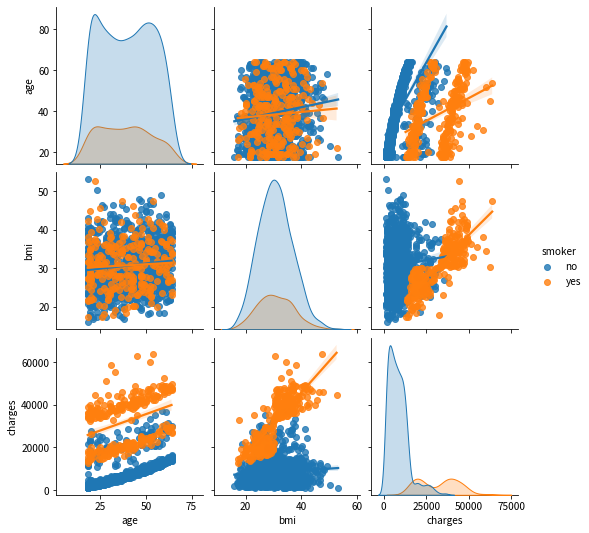

In [42]:
#問題16
# 医療費データの量的変数の散布図行列
sns.pairplot(data=df[["age","bmi","smoker","charges"]],kind="reg",diag_kind="kde",hue="smoker")
plt.show()

#### ヒント

      sns.pairplot(data=df[["age","bmi","smoker","charges"]],kind="reg",   diag_kind="kde",hue="smoker")
      plt.show()

を実行してみます。


喫煙習慣のあるなしが散布図の複雑なパターンと関連していることが分かります。


しかし、この喫煙習慣をダミー変数で取り入れただけでは散布図行列やバイオリンプロットの複雑なパターンを再現するモデルを作成することはできないでしょう。

例えば、bmiとchargesの散布図からは、bmiが30を超えてくると、医療費が高いグループと低いグループの2つのグループが出現することがわかっています。bmiはそもそも20から30あたりの値をとっていれば健康であるので、医療費がbmiに線形に依存しているとは考えにくいです。また、ageとchargesの散布図を見ると、線形よりは2次関数を採用した
ほうがよいかもしれません。


こうした知見をもとに、説明変数を追加していきます。こういう作業を特徴量エンジニアリングといいます。特徴量エンジニアリングや追加した説明変数のうち、どれを最終的に残すのかなどのモデル選択については後に扱います。

---

### 参考.分割表の検定（独立性の検定）

ここでは、分割表に対する独立性の検定を取り上げます。この検定手法は$\chi^2$(カイスクエア)検定と呼ばれます。

#### 分割表を用いるメリット

例えばWEBサイトを運営しているとします。商品の購入や問い合わせボタンなどのクリック率がボタンの色によって変わるかどうかを調べているとします。次のデータが得られました。このデータの表示形式を分割表、クロス集計表と呼びます。

$$
\begin{array}{|c|c|c|}   
\hline
& 押した人数 & 押さなかった人数 \\
\hline
青いボタン   & 20 & 180 \\
\hline
赤いボタン   & 10 & 90 \\
\hline
\end{array}
$$

分割表を見ると、青いボタンも赤いボタンも「押した：押さない」の比率は1：9となっています。つまり、クリック率はボタンに依存していないということです。この場合、ボタンの色とクリックするかしないか、は独立といいます。


また、以下のようなデータが得られたとします。

青いボタン：クリック率50％
赤いボタン：クリック率10％

これだと青いボタンのほうがクリック率が高いと結論できそうですが、分割表を見てみると次のようでした。

$$
\begin{array}{|c|c|c|}   
\hline
& 押した人数 & 押さなかった人数 \\
\hline
青いボタン   & 1 & 1 \\
\hline
赤いボタン   & 10 & 90 \\
\hline
\end{array}
$$

青いボタンの調査数が少なすぎて、結論は難しいことが分かると思います。









ここでは、以下の架空のクリック数データを対象とします。


$$
\begin{array}{|c|c|c|c|}   
\hline
& 押した人数 & 押さなかった人数 & 合計\\
\hline
青いボタン   & 20 & 230 & 250\\
\hline
赤いボタン   & 10 & 40 & 50 \\
\hline
合計 & 30 & 270 & 300 \\
\hline
\end{array}
$$

実際の観測データを観測度数と呼びます。
クリック率でみると、青ボタンが8\%、赤ボタンが20\%と、
赤いボタンのほうが高いように見えます。これが意味のある
差なのかどうかを統計的仮説検定で判断します。


#### 期待度数を求める

色によってボタンの押されやすさが変化するかどうかを判断することが目的です。その前に、「色によって押されやすさが全く変わらなかったらどのような結果になるのか」を考えてみましょう。この時に期待される度数を期待度数と呼びます。

つまり、ボタンの色とクリック率が独立であるという帰無仮説を設定し、この帰無仮説のもとで期待される度数を計算するのです。

データの最後の行を見ると、ボタンの色を考慮しないときの「押したor 押さない」の比率は30:270、つまり1:9となっていることが分かります。色を無視すれば全体の1割のひとがボタンを押すわけです。

一方、実験では300人のうち、250人が青いボタンを見せられ、50人が赤いボタンを見せられています。（理想的には300人がランダムに青と赤のボタンを見せられるのがよいです。）

すると、期待度数は、青いボタンを押す人数が25人、赤いボタンを押す人数が5人となります。押さなかった人数の期待度数はそれぞれ225人、45人です。よって、期待度数は次のようにまとめられます。


$$
\begin{array}{|c|c|c|}   
\hline
期待度数& 押した人数 & 押さなかった人数 \\
\hline
青いボタン   & 25 & 225 \\
\hline
赤いボタン   & 5 & 45 \\
\hline
\end{array}
$$

あとは、この期待度数と観測度数の差を調べます。この差が大きければ「ボタンの色はクリック率に影響する」と判断してよいでしょう。

なお、$\chi^2$検定では、標本分布の計算で正規近似を使うため、期待度数はすべて5以上であることをデータに課します。

### 期待度数と観測度数の差を求める

以下の値を計算します。ただしｍ$O_{ij}$はi行j列の観測度数、
$E_{ij}$は期待度数です。これをピアソンの$\chi^2$統計量と呼びます。


$$
\chi^2=
\sum_{i=1}^{m}
\sum_{j=1}^{n}
\frac{(O_{ij}-E_{ij})^2}{E_{ij}}
$$

m,nは分割表の行数と列数です。

これを実際に計算してみます。

$$
\chi^2=
\frac{(20-25)^2}{25}+
\frac{(230-225)^2}{225}+
\frac{(10-5)^2}{5}+
\frac{(40-45)^2}{45}=1+\frac{1}{9}+5+\frac{5}{9}=6\frac{2}{3}
$$

この$\chi^2$は帰無仮説が正しい場合に自由度$(m-1)(n-1)$の$\chi^2$分布に従います。一方、帰無仮説が間違っている場合、
$\chi^2$は大きな値をとります。





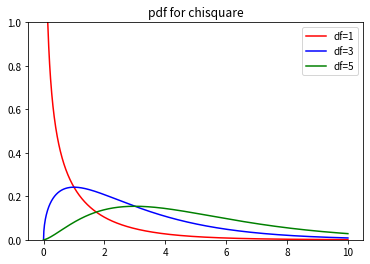

In [43]:
#@title
x=np.arange(0,10.01,step=0.01)
plt.plot(x,stats.chi2.pdf(x=x,df=1),color="red",label="df=1")
plt.plot(x,stats.chi2.pdf(x=x,df=3),color="blue",label="df=3")
plt.plot(x,stats.chi2.pdf(x=x,df=5),color="green",label="df=5")
plt.title("pdf for chisquare")
plt.ylim([0,1])
plt.legend()
plt.show()

p値の計算は、標本の$\chi^2$値よりも自由度$(m-1)(n-1)の
$\chi^2$分布に従う乱数が大きくなる確率です。

$$
\mbox{p-value}=P(\chi^2>\chi^2_{標本})
$$

In [44]:
# p-valueを計算
p_value=1-stats.chi2.cdf(6.66666,df = 1)
print(p_value)

0.009823311254105183


5％を下回りました。色によってボタンの押されやすさは変化すると判断できる証拠です。

#### 分割表の検定

Pythonでの分割表の独立性の検定は簡単に行えます。


In [45]:
click_data=pd.DataFrame({"color":["blue","blue","red","red"],"click":["click","not","click","not"],"freq":[20,230,10,40]})
print(click_data)

  color  click  freq
0  blue  click    20
1  blue    not   230
2   red  click    10
3   red    not    40


分割表に変換します。

In [46]:
cross=pd.pivot_table(data=click_data,values="freq",aggfunc="sum",index="color",columns="click")
print(cross)

click  click  not
color            
blue      20  230
red       10   40


検定を実行します。sp.stats.chi2_contingency()関数を使います。補正をいれずに計算したいのでcorrection=Falseとします。

In [47]:
stats.chi2_contingency(cross,correction=False)

Chi2ContingencyResult(statistic=6.666666666666666, pvalue=0.009823274507519247, dof=1, expected_freq=array([[ 25., 225.],
       [  5.,  45.]]))

結果は$\chi^2$値、p値、自由度、期待度数の表の順に出力されます。さきほどの計算と一致していることが分かります。

---


### 参考:T検定


統計的仮説検定は標本を用いて母集団に関する統計的な判断を行う方法です。判断の基準として確率的な表現を使います。統計的仮説検定にはさまざまな種類があり、判断する対象によって用いる手法も様々です。

母集団の一部である標本だけで母集団に対する判断を下すことは難しいことです。そのため、検定の結果の解釈は慎重に行う必要があります。

使用頻度が非常に高く、自分の分析で用いることもあれば、他人の分析結果を解釈する際にも必要になります。統計的仮説検定の是非については現在、盛んに議論されていますが、少なくとも検定の結果の解釈ができるようになっておくことは必要です。


#### 1.母平均のｔ検定

対象：平均値

判断内容：平均値が「ある値」と異なるかどうか

検定方法：平均値が「ある値」と仮定して、標本データが得られる確率を評価する。確率（p値）が小さいなら、仮定が誤っていると考える。背理法の一種。

有意差:仮説検定においては有意差という言葉がしばしば使われます。これは、サンプルで計算した標本平均と検定で判断したい「ある値」の差に「意味があるかどうか」を述べたものです。

































- ｔ値:ｔ検定における有意差ありの判断基準は次の3つです。

1. 標本の大きさ（サンプルサイズ）

2. データの分散（袋ごとの個体差や重量計の精度で決まる）

3. 標本平均値と比較対象値の乖離度（差）

この3つを合わせた指標をｔ値と呼びます。

$$
\mbox{t値}\equiv \frac{標本平均ー比較対象値}{\sqrt{標本分散/サンプルサイズ}}
= \frac{標本平均ー比較対象値}{標準誤差}
$$


このt値の絶対値が大きければ有意差ありと判断できます。






#### 仮説検定の枠組み：帰無仮説・対立仮説

ある仮説をたてて、その仮説を棄却するかどうかの判断を下します。棄却できなかった場合、ある仮説が正しいことが証明されるわけではなく、間違っているかどうかの証拠が不十分であったことになるだけです。

- 帰無仮説:棄却される対象の仮説

- 対立仮説:帰無仮説を否定したときに結論となる仮説

帰無仮説が棄却されたとき、すなわち帰無仮説が間違っていると判断できたなら、有意差があり、「スナック菓子の重量は50gと異なる」と判断します。




#### t値とｔ分布の関係

ｔ値の計算式は次の通りです。

$$
\mbox{t値}=\frac{\mbox{標本}平均-\mbox{帰無仮説で設定した値}}{\mbox{標準誤差}}
$$


帰無仮説が正しいなら、ｔ値は自由度が（サンプルサイズ-1）のｔ分布に従います。ｔ分布は原点を中心に分布をしています。サンプルからｔ値を計算したとき、その絶対値が大きいなら有意差があると判断できることになります。







#### ｔ値を用いた検定

- 有意水準αと棄却域と採択域の設定

t値が原点から離れているときに有意差が大きいと判断します。
原点から離れているかどうかを有意水準という確率αで決めます。
ｔ分布の下側確率がα/2と1-α/2の点よりも外側を棄却域、
内側を採択域と呼びます。帰無仮説が正しいなら、ｔ値が棄却域
に入る確率はαです。有意水準αに十分小さな値を設定すれば、
ｔ値が棄却域に入ったときに帰無仮説が誤っている証拠になります。

自由度$n-1$のｔ分布の下側確率$p$パーセント点を
$t_{p,n-1}$と書くことにします。

棄却域は次の式で定義される領域です：
$$
\mbox{棄却域}：t<t_{\alpha/2,n-1} \cup  
t>t_{1-\alpha/2,n-1}
$$

$$
\mbox{有意水準:}\alpha=P(\mbox{t値}<t_{\alpha/2,n-1} \cup  
\mbox{t値}>t_{1-\alpha/2,n-1})
$$

一方、帰無仮説が正しくて、確率αでｔ値は棄却域に入ります。
帰無仮説が正しいときに誤って棄却することを第1種の誤り（過誤）といいます。有意水準は第1種の誤りの確率となります。

---

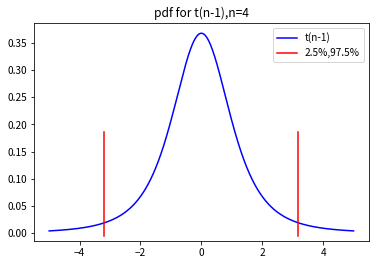

In [48]:
#@title
x=np.arange(-5,5.01,step=0.01)
plt.plot(x,stats.t.pdf(x=x,df=3),color="blue",label="t(n-1)")
plt.title("pdf for t(n-1),n=4")
t_0025=stats.t.ppf(df=3,q=0.025)
t_0975=stats.t.ppf(df=3,q=0.975)
plt.axvline(x=t_0025, ymin=0.02, ymax=0.5,color="red",label="2.5%,97.5%")
plt.axvline(x=t_0975, ymin=0.02, ymax=0.5,color="red")
plt.legend()
plt.show()

- p値

p値とは、帰無仮説の下で、標本が得られる確率を計算したものです。p値が小さいほど、帰無仮説では標本が観測されることはないことになり、矛盾の大きさ、有意差の大きさを示すことになります。ｐ値が0.01%なら、
帰無仮説を仮定するとその標本が得られる確率は0.01%、つまり1万回の調査をやって1回しか実現しないことが起きたことになります。もちろん、稀とはいえ起きうることではありますが、仮説検定では帰無仮説を否定する判断を下します。


- p値の計算方法

標本から計算したｔ値は帰無仮説が正しいとき、自由度n-1のｔ分布に従います。ｐ値は、自由度n-1のt分布に従う乱数ｔの絶対値がｔ値の絶対値
よりも大きくなる確率として計算します。

$$
\mbox{p値}　\equiv  P(|t|>|\mbox{ｔ値}|),t\sim t_{n-1}
$$








- p値を用いた検定

p値が小さいときに帰無仮説を棄却します。その棄却の基準を有意水準αが与えます。有意水準αには5%や1%などの小さい値を設定し、ｐ値が有意素準αを下回ると、帰無仮説を棄却します。





- データの準備

1変量データのｔ検定を行います。特徴は

1.  対象：平均値

2. 判断：平均値がある値（帰無仮説で設定した値）と異なると言えるかどうか

今回のデータはスナック菓子の重量を測定した架空のデータです。サンプルサイズは20です。Seriesとして読み込みます。

In [49]:
# データの読み込み
junk_food = pd.Series([ 58.5,52.4,74.4,53.0,55.9,67.7,47.7,50.3,56.5,52.4,45.5,53.4,52.1,59.8,41.7,49.4,64.2,69.9,42.9,60.2])

このデータを対象に、1標本のｔ検定を行います。

帰無仮説:$H_{0}:\mu=\mu_0$（スナック菓子の平均重量$\mu$は$\mu_0=50g$である）

対立仮説$H_{1}:\mu\neq \mu_0$(スナック菓子の平均重量$\mu$は50gと異なる)

有意水準は5\%とします。ｐ値を計算して5\%を下回れば、帰無仮説が棄却され、スナック菓子の重量は有意に50gと異なると主張するための証拠になります。

- t値の計算

まずはｔ値(t-value)を計算します。以下、サンプルサイズを$n$,標本平均を$\overline{x}$、不偏分散を$V^2$と書きます。

$$
\mbox{t-value}=\frac{\overline{x}-\mu_0}{\sqrt{\frac{V^2}{n}}}
=\frac{\overline{x}-\mu_0}{\mbox{標準誤差SE}}
$$

In [50]:
# 標本平均
mu = junk_food.mean()
mu

55.395

In [51]:
# 自由度
df = len(junk_food) - 1
df

19

In [52]:
# 標準誤差SE
V_sq = np.var(junk_food, ddof = 1)
SE = np.sqrt(V_sq/len(junk_food))
SE

1.9570046257643745

In [53]:
# t値
t_value = (mu - 50) /SE
t_value

2.7567640510266056

- p値の計算

$$
\mbox{p-value}=P(|t|>|\mbox{t-value}|)=2\times P(t>|\mbox{t-value}|)
$$

ｔ分布の累積分布はcdfメソッドで計算します。

     stats.t.cdf(q,df)

で自由とdfのｔ分布に従う乱数がq以下となる確率を計算できます。


自由度４のｔ分布と標準正規分布のcdfをｑに対してプロットしてみます。



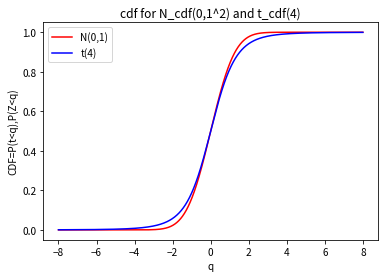

In [54]:
#@title
q=np.arange(-8,8.01,step=0.01)
plt.plot(q,stats.norm.cdf(x=q,loc=0,scale=1),color="red",label="N(0,1)")
plt.plot(q,stats.t.cdf(x=q,df=4),color="blue",label="t(4)")
plt.title("cdf for N_cdf(0,1^2) and t_cdf(4)")
plt.xlabel("q")
plt.ylabel("CDF=P(t<q),P(Z<q)")
plt.legend()
plt.show()

p値を計算します。

$$
\mbox{p-value}=2\times P(t>|\mbox{t-value}|)=2\times (1-P(t<|\mbox{t-value}|))
$$

In [55]:
# p値
import scipy.stats as stats
p_value=2*(1-stats.t.cdf(np.abs(t_value), df = df))
print(p_value)

0.01254950868492255


p値が有意水準5％を下回っているので、有意差ありとみなせます。スナック菓子の平均重量は50gと有意に異なっていると判断できます。


なお、

    stats.ttest_1samp(junk_food,50)

を使うと、もっと簡単に1標本ｔ検定を行うことができます。


In [56]:
# t検定
import scipy.stats as stats
stats.ttest_1samp(junk_food, 50)

TtestResult(statistic=2.7567640510266056, pvalue=0.012549508684922606, df=19)

statisticsがt値、pvalueがp値を表しています。

p値は5\%未満なので、有意水準を5\%と設定する場合、有意差があると判断します。スナック菓子の平均重量と50グラムの差は有意水準5\%で有意である、となります。

---

#### 2.平均値の差の検定

2つの集団で母平均に差があるかどうかを分析する手法です。
2つの集団の準備の仕方によって検定手法が異なります。

- 対応のあるT検定

1つの集団の各個体に対して2つの条件で計測したデータを対象にする場合です。条件が異なると平均値に差があるかどうかを判断します。例えば、薬を飲む前と飲んだ後で体温に差が出るかどうかを調べる場合です。

- 対応のないT検定

異なる2個の集団で計測したデータを対象にする場合です。集団が異なると平均値に差があるかどうかを判断します。例えば、薬の効果があるかどうかを調べる場合、実験参加者をランダムに2つのグループに分け、一つのグループには薬効を調べたい薬を投与し、もうひとつのグループにはプラセボ（偽薬）を与えた場合のデータです。

---
#### 対応のあるｔ検定


例えば、薬を飲む前と飲んだ後で体温に差が出るかどうかを調べる場合など、「同じ対象を異なった条件で2回測定して、その違いを見る」といった場合に「対応のあるｔ検定」を行います。

次の架空の調査データを使います。

$$
\begin{array}{|c|c|c|c|}
\hline
被験者 & 薬を飲む前の体温  & 薬を飲んだ後の体温 & 差分  \\
\hline
Aさん & 36.2 & 36.8 &0.6 \\
\hline
Bさん & 36.2 & 36.1 & -0.1 \\
\hline
Cさん &35.3 & 36.8 & 1.5\\
\hline
Dさん &36.1 & 37.1&  1.0 \\
\hline
Eさん &36.1 & 36.9 & 0.8\\
\hline
\end{array}
$$

このような「同じ対象で異なる条件で2回測定して違い」を見る場合、最後の列の「体温の差分」に注目します。もしも、薬が体温に何の影響も与えなければ、この差分は0を中心として分布するはずです。逆に言えば、差分の列の平均値が0と異なれば、「薬を飲む前と飲んだ後で体温が異なる」ことが主張できるわけです。

対応のあるｔ検定では、このように、差分$\Delta X=X^{After}-X^{Before}$をとってから
「差分値の平均が0と有意に異なるのか」という1群のｔ検定を行います。

$$
\Delta X\sim N(\Delta \mu,\sigma^2)
$$

帰無仮説$H_{0}: \Delta \mu=0$

対立仮説:$H_{1}: \Delta \mu>0,\Delta \mu \neq 0,\Delta \mu <0$


$\Delta \mu>0,\Delta \mu=0,\Delta \mu<0$の場合に対応して、右片側検定、
両側検定、左片側検定を使い分けます。薬の効果で体温が変化するかどうからな
両側検定、体温が上昇するかどうかを見たいなら右片側検定を行います。




- データの準備

薬を飲む前と飲んだ後で体温を測定した架空のデータです。サンプルサイズは10、データフレームとします。


In [57]:
# データの読み込み
paired_test_data = pd.DataFrame({"person":["A","B","C","D","E","A","B","C","D","E"],"medicine":["before","before","before","before","before","after","after","after","after","after"],
                                 "body_temperature":[36.2,36.2,35.3,36.1,36.1,36.8,36.1,36.8,37.1,36.9]})
print(paired_test_data)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1
5      A    after              36.8
6      B    after              36.1
7      C    after              36.8
8      D    after              37.1
9      E    after              36.9


- 対応のあるt検定の実装

帰無仮説：薬を飲む前後で体温は変わらない。

対立仮説：異なっている。

有意水準は5％とします。

対応のあるｔ検定では、正規乱数の差も正規乱数であることを使って、差の平均が0かどうかの１群のｔ検定を行う。



In [58]:
# 薬を飲む前と飲んだ後の標本平均
before = paired_test_data.query(
    'medicine == "before"')["body_temperature"]
after = paired_test_data.query(
    'medicine == "after"')["body_temperature"]
# アレイに変換
before = np.array(before)
after = np.array(after)
# 差を計算
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

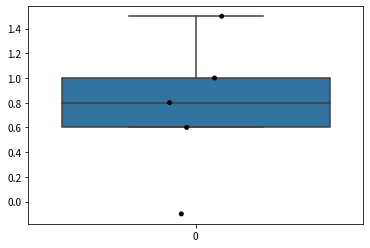

In [59]:
#@title
sns.boxplot(data=diff, showfliers=False)
sns.stripplot(data=diff, jitter=True, color='black')
plt.show()

後は、この差の値の平均値が0と異なるかどうかを1群のｔ検定で調べればよい。

In [60]:
# 平均値が0と異なるか検定
stats.ttest_1samp(diff, 0)

TtestResult(statistic=2.901693483620596, pvalue=0.044043109730074276, df=4)

stats.ttest_relを使うことも可能。

In [61]:
# 対応のあるt検定
stats.ttest_rel(after, before)

TtestResult(statistic=2.901693483620596, pvalue=0.044043109730074276, df=4)

ｐ値が5%を下回ったので、「薬を飲む前と飲んだ後で体温は有意に異なる」という主張の証拠が出来たことになる。

---

#### 対応の無いt検定

対応のないｔ検定では、標本平均が正規乱数であることから、2標本(異なる2個の条件でのそれぞれのサンプル)での2個の標本平均の差に着目します。

2群を正規母集団としてモデル化します。

$$
X_i \sim N(\mu_x,\sigma_x^2),i=1,\cdots,m,
Y_j\sim N(\mu_y,\sigma_y^2),j=1,\cdots,n
$$

それぞれの標本平均も正規乱数です。
$$
\overline{X}\sim N(\mu_x,\sigma_x^2/m),
\overline{Y}\sim N(\mu_y,\sigma_y^2/n)
$$

また、標本平均の差も正規乱数です。
$$
\Delta X-\Delta Y\sim N(\mu_x-\mu_y,\sigma_y^2/n+\sigma_x^2/m)
$$

標本平均の差からｔ値をもとめてｔ検定しますが、その手順は若干複雑です。



- $\sigma_x^2=\sigma_y^2=\sigma^2$；等分散の場合



X,Y共通の$\sigma^2$の不偏推定量：

$$
V^2=\frac{1}{m+n-2}(\sum_{i=1}^{m}(X_i-\overline{X})^2+\sum_{i=1}^{n}(Y_i-\overline{Y})^2)
$$

t値の計算式:

$$
\mbox{t-value} \equiv \frac{\overline{X}-\overline{Y}-(\mu_x-\mu_y)}{\sqrt{V^2/m+V^2/n}}\sim t_{m+n-2}
$$

自由度は$m+n-2$となり、後の手順は1群のｔ検定と同じ。





- 等分散かどうか不明の場合


分散が等しいと仮定できない場合も標本平均の差を準標準化する。この場合は近似的にｔ分布に従うので、t検定を行う。ただし、自由度の計算は複雑。この近似的なｔ分布を用いる方法をウェルチの方法と呼ぶ。

$$
V_x^2=\frac{1}{m-1}\sum_{i=1}^{m}(X_i-\overline{X})^2
$$

$$
V_y^2=\frac{1}{n-1}\sum_{i=1}^{n}(Y_i-\overline{Y})^2
$$

t値の計算式:

$$
\mbox{t-value}=\frac{\overline{X}-\overline{Y}-(\mu_x-\mu_y)}{\sqrt{V_x^2/m+V_y^2/n}}\sim t_{\mbox{Welch}}
$$

t分布の自由度の計算式は複雑。

[Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%A6%E3%82%A7%E3%83%AB%E3%83%81%E3%81%AEt%E6%A4%9C%E5%AE%9A)


- 対応のないｔ検定の実装

では、データで検定してみます。

まず、変数Xを平均10、分散1の正規乱数10個、変数Yを平均11、分散１の正規乱数10個として生成します。





In [62]:
np.random.seed(1)  # 乱数の種を1625で初期化
X=stats.norm(loc=10,scale=1).rvs(10) # 平均(loc)10,標準偏差1の正規乱数を10個生成
Y=stats.norm(loc=11,scale=1).rvs(10) # 平均(loc)11,標準偏差1の正規乱数を10個生成
df=pd.DataFrame({"x":X,"y":Y})       
#df[["x","y"]].boxplot(figsize=(8,6))
#plt.title("Boxplot of Xand Y")
#plt.ylim([7,13])
#plt.show()

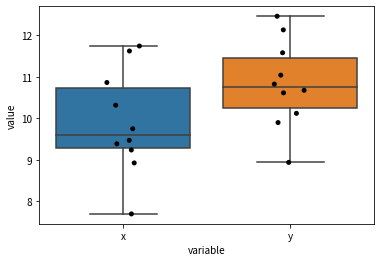

In [63]:
#@title
df_melt = pd.melt(df) #melt()はpivot()の逆のことをします。
#print(df_melt)
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
sns.stripplot(x='variable', y='value', data=df_melt, jitter=True, color='black')
plt.show()

In [64]:
# 平均値
mean_x = np.mean(X)
mean_y = np.mean(Y)
# 分散
V_sq_x = np.var(X, ddof = 1)
V_sq_y = np.var(Y, ddof = 1)
# サンプルサイズ
m = len(X)
n = len(Y)
m,n,mean_x,mean_y,V_sq_x,V_sq_y

(10,
 10,
 9.9028591091939,
 10.83041161788464,
 1.5758215125643313,
 1.1092004645011277)

- 等分散と仮定する場合

X,Yの不偏分散は
$$
V_x^2=\frac{1}{m-1}\sum_{i=1}^{m}(X_i-\overline{X})^2
$$

$$
V_y^2=\frac{1}{n-1}\sum_{i=1}^{n}(Y_i-\overline{Y})^2
$$

より、X,Yの共通の分散の推定値は

$$
V^2=\frac{1}{m+n-2}(\sum_{i=1}^{m}(X_i-\overline{X})^2+\sum_{i=1}^{n}(Y_i-\overline{Y})^2)
=\frac{1}{m+n-2}(V_x^2+V_y^2)
$$

t値の計算式:

$$
\mbox{t-value} \equiv \frac{\overline{X}-\overline{Y}-(\mu_x-\mu_y)}{\sqrt{V^2/m+V^2/n}}\sim t(m+n-2)
\sim t(m+n-2)
$$

自由度は$m+n-2$となり、後の手順は1群のｔ検定と同じ。




In [65]:
# 共通の分散
V_sq=(V_sq_x*(m-1)+V_sq_y*(n-1))/(m+n-2)
# t値
t_value = (mean_x - mean_y) /np.sqrt(V_sq/m+V_sq/n)
V_sq,t_value

(1.3425109885327295, -1.790047609545846)

p値を計算すると

In [66]:
# p値
df=m+n-2
p_value=2*(1-stats.t.cdf(np.abs(t_value), df = df))
print(p_value)

0.09028280113864429


対応のないｔ検定はstats.ttest_ind関数を用いる。

In [67]:
stats.ttest_ind(X,Y, equal_var = True)

Ttest_indResult(statistic=-1.7900476095458457, pvalue=0.09028280113864433)

ｐ値が5％をうわまわったので、今回のサンプルでは有意差は確認できなかったことになります。

- 等分散と仮定しない場合(Welchのｔ検定)

母集団の分散が等しいかどうかわからないときは、Welchのｔ検定を用います。

In [68]:
# t値
t_value = (mean_x - mean_y) /np.sqrt((V_sq_x/m + V_sq_y/n))
t_value

-1.790047609545846

対応のないｔ検定はstats.ttest_ind関数を用いる。

In [69]:
stats.ttest_ind(X,Y, equal_var = False)

Ttest_indResult(statistic=-1.790047609545846, pvalue=0.09079127068038591)

ｐ値が5％をうわまわったので、今回のサンプルでは有意差は確認できなかったことになります。

- 等分散の仮定

古い統計学の教科書では、まずX,Yの分散が等しいかどうかの検定を行い、等分散が棄却できない場合は、等分散を仮定して検定を行い、棄却された場合はWelchの方法で検定を行うと説明しているものがあります。こうした方法は誤りですのでやめましょう。理由は、検定して等分散が棄却されなかったからといって、等分散だと証明できたわけではないこと。また、同じデータで検定を何度も行うことは有意水準が意図せずに大きくなってしまうためです。これを検定の多重性の問題といいます。

- pハッキング

平均値の差の検定でもいろいろあります。ここではｔ検定を紹介しましたが、Ｕ検定なども有名で、有意差の出やすさも検定手法によって異なります。ここで、ｐ値が有意水準より大きくなった場合、有意差はない、小さくなった場合は、有意差があると結論して研究を評価する文化があると、その文化の中で研究をアピールするにはｐ値を小さくするために頑張ることが起きてしまいます。これをｐハッキングと呼びます。

特に、研究者の世界は業績が論文でカウントされるので、論文の受理にｐ値が絡んでくる場合は悲惨なことになります。同じデータでさまざまな検定手法を試してみて、有意水準を切るものを探す、有意水準を切るまでデータを増やしてみる、いろいろなｐハッキングの方法があります。

問題は、ｐハッキングは発表された論文からは確認が難しいことです。そのため、現在は統計的仮説検定の禁止やｐ値のみで論文を受理することはやめましょう、という流れになっています。

ちなみに、仮説検定を最初に提案したフィッシャーは、ｐ値は証拠のひとつなので、何度も何度もくりかえして初めて科学的な結論が出ると考えていました。

---



### 参考：F検定（分散分析ANOVA）

実験で条件を変えたとき、条件ごとに母平均が異なるかどうかを検定する手法です。
条件ごとの平均値を計算し、そのバラツキの大きさを分散を用いて分析するため分散分析と呼びます。Analysis of Variance なので、ANOVAとも呼びます。

実験で変更する条件が1種類の場合、1元配置分散分析(one-way ANOVA)
、2種類の場合、2元配置分散分析(two-way ANOVA)と呼びます。

例えば、肥料A,B,Cで作物の収穫量を比較するなら1元配置分散分析、肥料A,B,Cと日当たりがよいかX,Yの組み合わせAX,BX,CX,AY,BY,CYで比較するなら2元配置分散分析を用います。

3個以上の集団で母平均を比較する場合、1元配置分散分析を用います。

T検定と同じく、母集団が正規分布であることを仮定し、更に分散が等しいことも仮定するので、検定結果は弱い証拠のひとつでしかありません。







例題として、天候とビールの売上の関係を考えてみます。目的変数は売上、説明変数は天候です。天気は曇り・雨・晴れの3個の要素（水準といいます）を持つとします。

分散分析での帰無仮設と対立邪説は

- 帰無仮設：水準間で母平均に差はない＝天気は売り上げに影響しない

- 対立仮設：どれかの水準間で母平均に差がある

分散分析では、データの変動を「誤差」と「効果」に分離します。その上でF値(F-value)と呼ばれる統計量を計算します。

$$
\mbox{F-value}=\frac{効果の分散の大きさ}{誤差の分散の大きさ}
$$

ここの例題では、効果とは「天気がもたらす売上の変動」のことです。誤差とは、「天気という説明変数で説明できなかったビールの売上の変動」です。F値は、効果の大きさが誤差の大きさと比べてどれだけ大きいかと計測するものです。効果がない場合、効果の大きさは誤差の大きさと等しくなり、F値は１に近い値をとりあます。

誤差の大きさ、効果の大きさは二乗して分散に変換して定量化します。「天気がもたらす売上の変動」は天気の変化による売上のバラツキの分散で定量化し、誤差も残差の分散で定量化します。分散の比をとった統計量を用いて検定を行うため、分散分析と呼びます。

F値が大きい場合、誤差に比べて効果が大きいと判断します。F値が１に近い場合、効果の分散と誤差の分散が同程度であること意味するので、効果はないと判断します。母集団分布が同じ平均値の正規分布に従う場合、F値はF分布に従います。データから計算したF値から、データのF値が実現する確率をp値に変換し、仮説検定を行います。適宜、有意水準を設定し、母平均に差があるかどうかを判断します。



#### 有意差が出る場合と出ない場合

分散分析のイメージをつかむために、水準が3で、有意差がある場合とない場合のバイオリンプロットを見てみます。


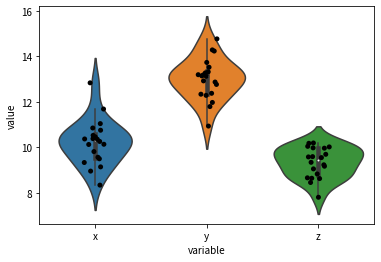

In [70]:
#@title
np.random.seed(1625)  # 乱数の種を1625で初期化
X=stats.norm(loc=10,scale=1).rvs(20) # 平均(loc)10,標準偏差1の正規乱数を20個生成
Y=stats.norm(loc=13,scale=1).rvs(20) # 平均(loc)13,標準偏差1の正規乱数を20個生成
Z=stats.norm(loc=9,scale=1).rvs(20) # 平均(loc)9,標準偏差1の正規乱数を20個生成
df_s=pd.DataFrame({"x":X,"y":Y,"z":Z})
df_melt = pd.melt(df_s) #melt()はpivot()の逆のことをします。
sns.violinplot(x='variable', y='value', data=df_melt, showfliers=False)
sns.stripplot(x='variable', y='value', data=df_melt, jitter=True, color='black')
plt.show()       

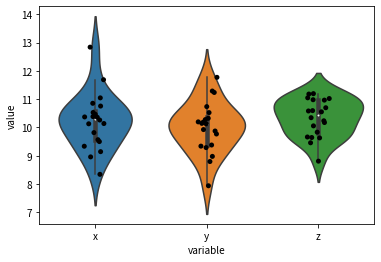

In [71]:
#@title
np.random.seed(1625)  # 乱数の種を1625で初期化
X=stats.norm(loc=10,scale=1).rvs(20) # 平均(loc)10,標準偏差1の正規乱数を20個生成
Y=stats.norm(loc=10,scale=1).rvs(20) # 平均(loc)10,標準偏差1の正規乱数を20個生成
Z=stats.norm(loc=10,scale=1).rvs(20) # 平均(loc)10,標準偏差1の正規乱数を20個生成
df_ns=pd.DataFrame({"x":X,"y":Y,"z":Z})
df_melt = pd.melt(df_ns) #melt()はpivot()の逆のことをします。
sns.violinplot(x='variable', y='value', data=df_melt, showfliers=False)
sns.stripplot(x='variable', y='value', data=df_melt, jitter=True, color='black')
plt.show()

上のプロットの母集団では、母平均が10,13,9と異なる値にセットされていて差がありますが、下のプロットの集団のプロットでは母平均を10と共通の値にセットしています。

上のプロットからは有意差が判定できそうですが、その判定を定量的に行うには分散分析が必要です。

#### 分散分析の直感的な考え方：誤差と効果の分離

厳密なものではありませんが、誤差と効果の大きさの直感的な説明を与えます。




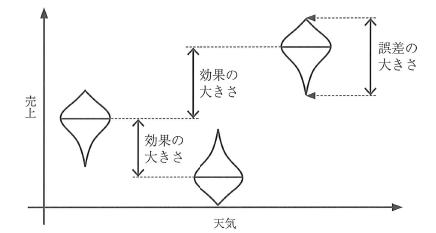

上図のバイオリン同士の距離が効果の大きさです。また、バイオリンの幅が誤差の大きさです。

各々のバイオリンは天気の水準毎に分かれています。バイオリン同士の距離は「天気による売り上げの変化」を表しています。そのため、バイオリン同士の距離は効果と考えられます。

一方、同じ天気でも売り上げはある程度バラツキます。天気では説明できないバラツキの大きさが誤差の大きさと考えられますが、それは個々のバイオリンの上下の幅で表されます。

#### 群間変動・郡内変動

バイオリン同士の距離、すなわち効果の大きさのことを群間変動と呼びます。また、個々のバイオリンの幅、すなわち誤差の大きさのことを郡内変動と呼びます。分散分析では、データの分散を群間変動と郡内変動に分解し、その比を統計量として検定を行います。

---

データで効果と分散の大きさを評価してみましょう。

-  データの作成と表示

雨、曇り、晴れでの架空の売上を用意します。

In [72]:
# サンプルデータの作成
weather = ["rainy","rainy","rainy","cloudy","cloudy","cloudy","sunny","sunny","sunny"]
beer = np.array([1,2,3,4,5,6,7,8,9])
# データフレームにまとめる
weather_beer = pd.DataFrame({"beer": beer,"weather": weather})
print(weather_beer)

   beer weather
0     1   rainy
1     2   rainy
2     3   rainy
3     4  cloudy
4     5  cloudy
5     6  cloudy
6     7   sunny
7     8   sunny
8     9   sunny


In [73]:
# 各データの平均値
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy      5
rainy       2
sunny       8


<Axes: xlabel='weather', ylabel='beer'>

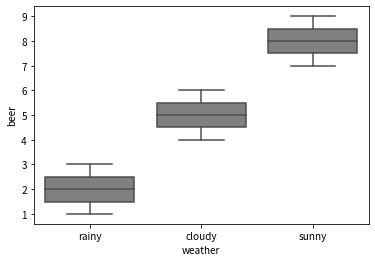

In [74]:
# 箱ひげ図を描く
sns.boxplot(x = "weather",y = "beer",data = weather_beer, color='gray')

各水準（天気）での平均値は2,5,8です。天気の売上に対する効果は、全体の売上の平均値5を基準として考えると、雨、曇り、晴れの効果は-3,0,3となります。この二乗和を群間変動と呼びます。

一方、誤差の大きさは各天気でのバラツキで評価すると、各天気での売上は各天気での平均値2,5,8平均値を中心に±１です。この二乗和を群内変動と呼びます。

箱ひげ図を見ても天気の効果が、天気では説明できない誤差の大きさよりも大きいことがわかると思います。

では、群間変動と群内変動を計算します。

- 群間・群内平方和の計算

まず、データの変動に着目するので、全体の平均値を基準に考え、各天気での平均値から全平均を引きます。



In [75]:
# 天気の持つ効果
effect=[2,2,2,5,5,5,8,8,8]-np.mean(beer)
print(effect)

[-3. -3. -3.  0.  0.  0.  3.  3.  3.]


In [76]:
# 群間の平方和
squares_model=np.sum(effect**2)
squares_model

54.0

群間平方和から効果の大きさを効果の分散の大きさで計測します。分散を推定するには、効果の二乗和を(自由度-1)で割ります。3個の水準の場合、由度は3-1=2となります。

In [77]:
# 効果の自由度
df_model=2

In [78]:
## 効果の分散の推定
variance_model=squares_model/df_model
variance_model

27.0

次に天気では説明できない誤差の大きさです。各水準（群）における平均値との差である残差が売上を天気で説明するモデルで説明できない誤差になります。

In [79]:
# 天気では説明することができない誤差＝残差(residuals)
resid = beer - [2,2,2,5,5,5,8,8,8]
resid

array([-1,  0,  1, -1,  0,  1, -1,  0,  1])

In [80]:
# 群内の平方和＝残差平方和
squares_resid = np.sum(resid ** 2)
squares_resid

6

誤差の分散の大きさを推定するには残差の平方和を(自由度-1)で割ればよいのです。各水準で水準平均を引いて残差にしているので自由度は2です。水準は3なので、自由度は2×3の6となります。

ちなみに、全データ数は9でしたが、全平均を引いたので自由度は8となり、効果の自由度は2、誤差の自由度は6と分解されています。

$$
9-1=8=2+6
$$

In [81]:
# 残差の自由度
df_resid=6

In [82]:
## 誤差の分散の推定
variance_resid=squares_resid/6
variance_resid

1.0

- F値の計算

$$
\mbox{F値}=\frac{\mbox{効果の不偏分散}}{\mbox{誤差の不偏分散}}
=\frac{27}{1}=27
$$

１よりも圧倒的に大きいので水準間の平均値に有意差があると判断できそうです。


- p値の計算

In [83]:
# F-value
F_value = variance_model / variance_resid
F_value

27.0

In [84]:
# p値
import scipy.stats as stats
1 - stats.f.cdf(x=F_value,dfn=df_model,dfd=df_resid)

0.0010000000000000009

scipy.statsモジュールのF_onewayで一元配置分散分析が可能です。
各水準のデータを関数の引数に設定します。


In [85]:
Rainy=weather_beer[weather_beer.weather=="rainy"].beer
Cloudy=weather_beer[weather_beer.weather=="cloudy"].beer
Sunny=weather_beer[weather_beer.weather=="sunny"].beer
Rainy,Cloudy,Sunny

(0    1
 1    2
 2    3
 Name: beer, dtype: int64,
 3    4
 4    5
 5    6
 Name: beer, dtype: int64,
 6    7
 7    8
 8    9
 Name: beer, dtype: int64)

In [86]:
import scipy.stats as stats
stats.f_oneway(Rainy,Cloudy,Sunny)

F_onewayResult(statistic=27.0, pvalue=0.0010000000000000002)

同じ結果を再現できました。

---

## 演習

ここでは、分類問題を念頭において、目的変数に関係する説明変数や、
追加すべき説明変数の候補を探す探索的データ分析を行います。データとして、seabornに用意されているtitanicデータセットを用います。目的変数は乗客の生死を表すsurvivedです。説明変数はその他のすべての列（変数です）。

[titanic@kaggle](https://www.kaggle.com/competitions/titanic)

このデータには乗客891人しか含まれていません。（本当の乗客数はもっと多い。）


|  列名 |   内容      |
|---------|----------------|
|   survived |生存状況（0=死亡、1=生存）|
|   sex | 性別 |
| age | 年齢 |
|sibsp | タイタニック号に同乗している兄弟（Siblings）や配偶者（Spouses）の数 |
| parch|タイタニック号に同乗している親（Parents）や子供（Children）の数 |
| fare |旅客運賃 |
| embarked |出港地（C=Cherbourg:シェルブール、Q=Queenstown:クイーンズタウン、S=Southampton:サウサンプトン）|
|class | 旅客クラス（1=1等、2=2等、3=3等）|
|who |  男女子供（man/woman/child） |
|alone | 一人旅かどうか  |


まず、seabornからtitanicデータセットをデータフレームdfにロードします。

    sns.load_dataset("titanic)


そして、不要なデータの削除と欠損値の補間を行います。次のセルを実行してください。


-  aloneはparch+sibsp=0と同じなので削除しています。

In [87]:
# titanicデータとmatplotlib.pyplot,numpy,pandas,scipy.statsの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df = sns.load_dataset("titanic",dtype={"survived":"int","sex":"category","embarked":"category","embark_town":"category","who":"category","alive":"category"})
# dfの=["pclass","deck","alive","adult_male","embark_town","alone"]列を削除します。
df.drop(columns=["pclass","deck","alive","adult_male","embark_town","alone"],inplace=True)
# embarked列の欠損値を"S"で補完します。
df.fillna({"embarked":"S"},inplace=True)
# age列の欠損値を中央値で補完します。
df.fillna({"age":df["age"].median()},inplace=True)

次の順番で調べてみましょう。

1. データの確認：データの大きさ、変数の数、行数、各変数の型を調べる。
2. 欠損値・異常値の確認：欠損値・異常値がないかどうか。あった場合、該当データの削除か補間。
3. 変数の統計と分布：各列の変数の統計量と分布を計算します。
4. 相関関係：変数間の関係、特に目的変数と説明変数の関係。


#### 問題17

(1)データの列数、行数、サイズを調べ、nrow,ncol,nsizeに入力し表示せよ。

(2)各変数の型をinfo()メソッドで調べてdata_typesに入力し表示せよ。

(3)各列毎の欠損値の総数を調べ、n_naに入力し、表示せよ。

(4)先頭3行、最後の3行を表示せよ。

In [88]:
#問題17(1)
# データの列数、行数、サイズを調べ、nrow,ncol,nsizeに入力し表示
nsize=df.size
ncol=df.shape[1]
nrow=df.shape[0]
print(nrow,ncol,nsize)

891 9 8019


In [89]:
#問題17(2)
# 各変数の型をinfo()メソッドで調べてdata_typesに入力し表示せよ。
data_types=df.info()
print(data_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    category
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   fare      891 non-null    float64 
 6   embarked  891 non-null    category
 7   class     891 non-null    category
 8   who       891 non-null    category
dtypes: category(4), float64(2), int64(3)
memory usage: 38.9 KB
None


In [90]:
#問題17(3)
# 各列毎の欠損値の総数を調べ、n_naに入力し、表示せよ。
n_na=df.isnull().sum(axis=0)
print(n_na)

survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
dtype: int64


In [91]:
#問題17(4)
# 先頭3行、最後の3行を表示せよ。
print(df.head(3))
print(df.tail(3))

   survived     sex   age  sibsp  parch     fare embarked  class    who
0         0    male  22.0      1      0   7.2500        S  Third    man
1         1  female  38.0      1      0  71.2833        C  First  woman
2         1  female  26.0      0      0   7.9250        S  Third  woman
     survived     sex   age  sibsp  parch   fare embarked  class    who
888         0  female  28.0      1      2  23.45        S  Third  woman
889         1    male  26.0      0      0  30.00        C  First    man
890         0    male  32.0      0      0   7.75        Q  Third    man


#### 問題18

(1)age,fareの統計量をdescribe()メソッドで計算し表示。

(2)age,fareのヒストグラムを表示。グラフは横に並べる。

(3)survived,sex,sibsp,parch,embarked,class,whoは要素の比率を求めser1,ser2,ser3,ser4,ser5,ser6,ser7に代入。

(4)(3)の要素の比率を棒グラフで表示。グラフは2行にする。




In [92]:
#問題18(1)
# age,fareの統計量をdescribe()メソッドで計算し表示。
print(df["age"].describe(),df["fare"].describe())

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


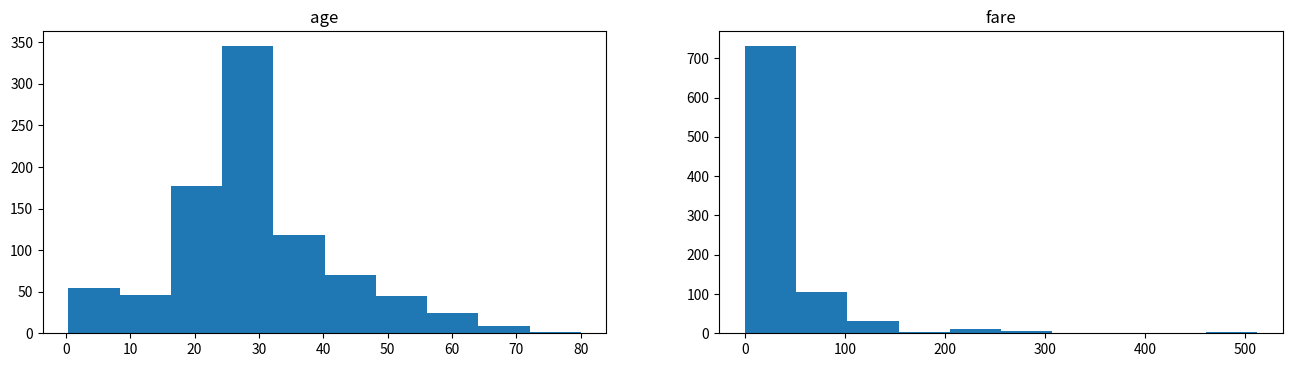

In [93]:
#問題18(2)
# age,fareのヒストグラムを表示。グラフは横に並べる。
#figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(1,2 ,figsize=(16,4),dpi=100)
#グラフの作成
ax[0].hist(df["age"])
ax[0].set_title("age")
ax[1].hist(df["fare"])
ax[1].set_title("fare")
#グラフの表示
plt.show()

In [94]:
#問題18(3)
# survived,sex,sibsp,parch,embarked,class,whoは要素の比率を求めser1,ser2,ser3,ser4,ser5,ser6,ser7に代入。
ser1=df["survived"].value_counts(normalize=True)
ser2=df["sex"].value_counts(normalize=True)
ser3=df["sibsp"].value_counts(normalize=True)
ser4=df["parch"].value_counts(normalize=True)
ser5=df["embarked"].value_counts(normalize=True)
ser6=df["class"].value_counts(normalize=True)
ser7=df["who"].value_counts(normalize=True)

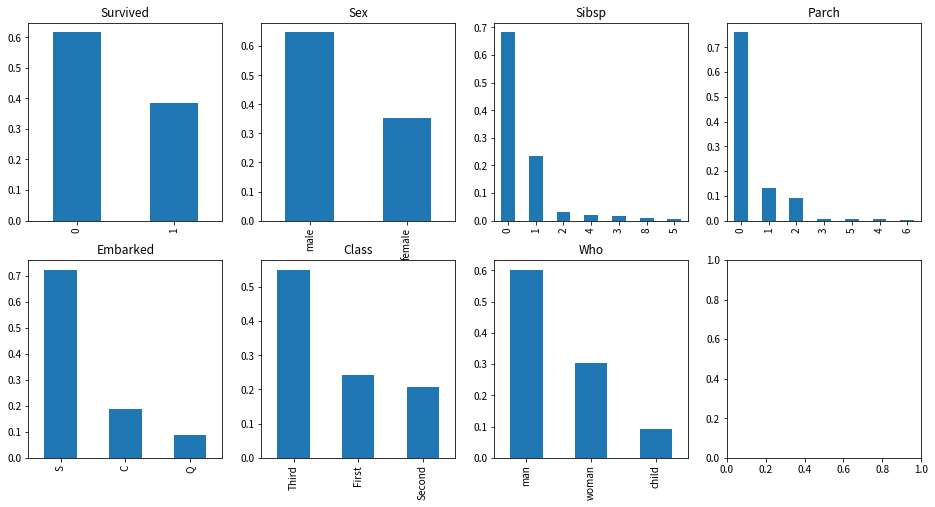

In [95]:
#問題18(4)
# 要素の比率の棒グラフ2
#figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(2, 4, figsize=(16,8))
#グラフの作成
ser1.plot.bar(title="Survived",ax=ax[0,0])
ser2.plot.bar(title="Sex",ax=ax[0,1])
ser3.plot.bar(title="Sibsp",ax=ax[0,2])
ser4.plot.bar(title="Parch",ax=ax[0,3])
ser5.plot.bar(title="Embarked",ax=ax[1,0])
ser6.plot.bar(title="Class",ax=ax[1,1])
ser7.plot.bar(title="Who",ax=ax[1,2])
#グラフの表示
plt.show()

#### 問題19

(1)age,fareの散布図をプロット。生死で色を変える。

(2)age,survivedの相関係数を計算し、corr_age_vs_survivedに代入し表示.corr()メソッドの出力はデータフレームなのでiloc[0,1]で0,1成分を抽出する.

(3)fare,survivedの相関係数を計算し、corr_fare_vs_survivedに代入し表示.


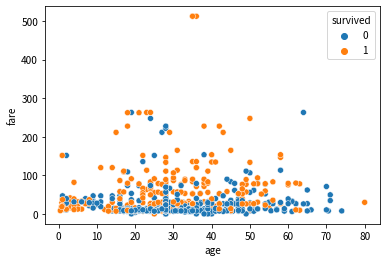

In [96]:
#問題19(1)
# age,fareの散布図をプロット。生死で色を変える。
sns.scatterplot(data=df,x="age",y="fare",hue="survived")
plt.show()

In [97]:
#問題19(2)
# age,survivedの相関係数を計算し、corr_asに代入し表示.
corr_age_vs_survived=df.corr()
print(corr_age_vs_survived.iloc[0,1])

-0.06491041993052588


In [98]:
#問題19(3)
# fare,survivedの相関係数を計算し、corr_fare_vs_survivedに代入し表示.
corr_fare_vs_survived=df.corr()
print(corr_fare_vs_survived.iloc[0,4])

0.2573065223849626


年齢と生死は無相関ですが、fareと生死は相関があります。

#### 問題20

(1)sex,sibsp,parch,embarked,class,who,aloneの各要素に対する生存率を棒グラフとして表示せよ。


(2)sex,sibsp,parch,embarked,class,who,aloneを行、survivedを列とするクロス集計表を作成し、独立性の検定を行え



(3)classを行、sexを列として生存率を計算し、クロス集計表を作成しなさい。


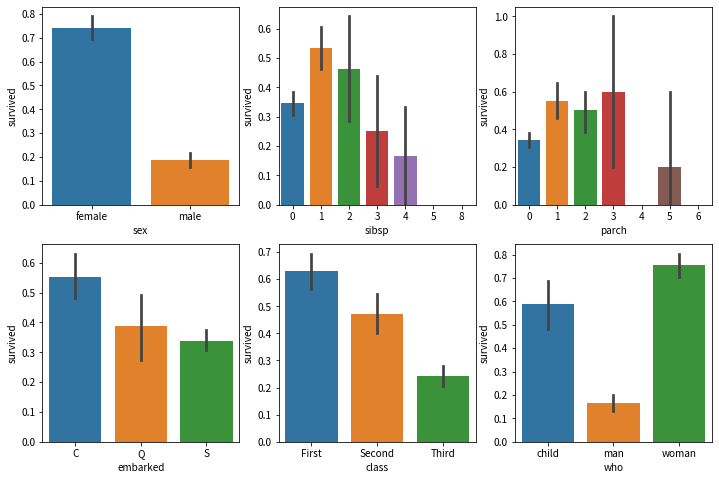

In [99]:
#問題20(1)
#figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(2,3, figsize=(12,8))
sns.barplot(data=df,x="sex",y="survived",ax=ax[0,0])
sns.barplot(data=df,x="sibsp",y="survived",ax=ax[0,1])
sns.barplot(data=df,x="parch",y="survived",ax=ax[0,2])
sns.barplot(data=df,x="embarked",y="survived",ax=ax[1,0])
sns.barplot(data=df,x="class",y="survived",ax=ax[1,1])
sns.barplot(data=df,x="who",y="survived",ax=ax[1,2])
# グラフの表示
plt.show()

#### ヒント：

      fig, ax = plt.subplots(2, 3, figsize=(12,8))
      sns.barplot(data=df,x="sex",y="survived",ax=ax[0,0])

と、sns.barplot()関数でaxにaxオブジェクトを指定する。

In [100]:
#問題20(2)
# クロス集計
cross_sex_vs_survived=pd.pivot_table(data=df,values="age",aggfunc="count",index="sex",columns="survived")
cross_sibsp_vs_survived=pd.pivot_table(data=df,values="age",aggfunc="count",index="sibsp",columns="survived")
cross_parch_vs_survived=pd.pivot_table(data=df,values="age",aggfunc="count",index="parch",columns="survived")
cross_embarked_vs_survived=pd.pivot_table(data=df,values="age",aggfunc="count",index="embarked",columns="survived")
cross_class_vs_survived=pd.pivot_table(data=df,values="age",aggfunc="count",index="class",columns="survived")
cross_who_vs_survived=pd.pivot_table(data=df,values="age",aggfunc="count",index="who",columns="survived")
print(cross_sex_vs_survived)
print(cross_sibsp_vs_survived)
print(cross_parch_vs_survived)
print(cross_embarked_vs_survived)
print(cross_class_vs_survived)
print(cross_who_vs_survived)

survived    0    1
sex               
female     81  233
male      468  109
survived      0      1
sibsp                 
0         398.0  210.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN
survived      0      1
parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN
survived    0    1
embarked          
C          75   93
Q          47   30
S         427  219
survived    0    1
class             
First      80  136
Second     97   87
Third     372  119
survived    0    1
who               
child      34   49
man       449   88
woman      66  205


#### ヒント：

欠損値があると検定ができない。
isnull()で欠損値を確認し、データがなく空欄(NaN)となる行がある場合、その行を削除
sibspとsurvivedのクロス集計にはsibsp=5,8にNaNがあるので、次を実行する。他も同様。

      cross_sibsp_vs_survived.drop([5,8], inplace=True)



In [101]:
#問題20(2)
# データのない行を削除
cross_sibsp_vs_survived.drop([5,8], inplace=True)
print(cross_sibsp_vs_survived)
cross_parch_vs_survived.drop([4,6], inplace=True)
print(cross_parch_vs_survived)

survived      0      1
sibsp                 
0         398.0  210.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
survived      0      1
parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
5           4.0    1.0


In [102]:
#問題20(2)
# 独立性の検定1
print("Sex")
print(stats.chi2_contingency(cross_sex_vs_survived,correction=False))
print("Sibsp")
print(stats.chi2_contingency(cross_sibsp_vs_survived,correction=False))
print("Parch")
print(stats.chi2_contingency(cross_parch_vs_survived,correction=False))
print("Embarked")
print(stats.chi2_contingency(cross_embarked_vs_survived,correction=False))
print("Class")
print(stats.chi2_contingency(cross_class_vs_survived,correction=False))
print("Who")
print(stats.chi2_contingency(cross_who_vs_survived,correction=False))

Sex
Chi2ContingencyResult(statistic=263.05057407065567, pvalue=3.711747770113424e-59, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))
Sibsp
Chi2ContingencyResult(statistic=29.54567573457044, pvalue=6.0554702010956636e-06, dof=4, expected_freq=array([[371.44027304, 236.55972696],
       [127.68259386,  81.31740614],
       [ 17.10580205,  10.89419795],
       [  9.77474403,   6.22525597],
       [ 10.99658703,   7.00341297]]))
Parch
Chi2ContingencyResult(statistic=24.741298236730742, pvalue=5.6708458522482264e-05, dof=4, expected_freq=array([[416.28893905, 261.71106095],
       [ 72.45146727,  45.54853273],
       [ 49.11963883,  30.88036117],
       [  3.06997743,   1.93002257],
       [  3.06997743,   1.93002257]]))
Embarked
Chi2ContingencyResult(statistic=25.964452881874784, pvalue=2.3008626481449577e-06, dof=2, expected_freq=array([[103.51515152,  64.48484848],
       [ 47.44444444,  29.55555556],
       [398.04040404, 247.95959596]])

In [103]:
#問題20(3)
# 生存率の計算
survived_class_vs_sex=pd.pivot_table(data=df,values="survived",index="class",columns="sex")
print(survived_class_vs_sex)

sex       female      male
class                     
First   0.968085  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


#### 問題21

量的変数や他の質的変数と目的変数survivedの相関関係を分析するために、目的変数で層別化し分析する。

(1)sexとsurvived で層別化してageの箱ひげ図をプロットせよ。

(2)sexで層別化し、survived でマーカーを変えてageをswarmplot(sns.swarmplot)せよ。

(3)sexで層別化し、survived でマーカーを変えてfareをswarmplot(sns.swarmplot)せよ。



swarm（スウォーム）は（ミツバチなどの）群れを意味する英語である。

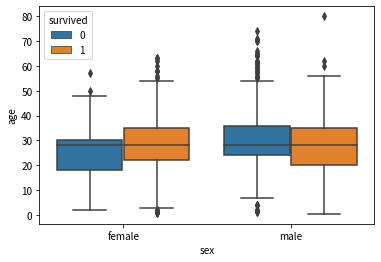

In [104]:
#問題21(1)
sns.boxplot(data=df,x="sex",y="age",hue="survived")
plt.show()

#### ヒント

    sns.boxplot(data=df,x="sex",y="age",hue="survived")

を実行する

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

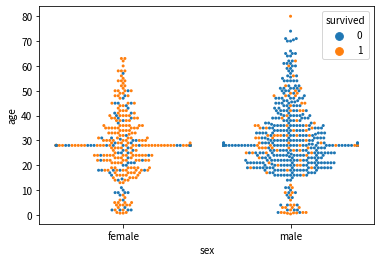

In [105]:
#問題21(2)
sns.swarmplot(data=df,x="sex",y="age",hue="survived",size=3)
#plt.show()

#### ヒント


    sns.swarmplot(data=df,x="sex",y="age",hue="survived",size=3)

を実行する。

女性の場合、年齢に関係なく生存している

男性の場合、子供は生存し、あとは年齢と生死に関係はない。

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


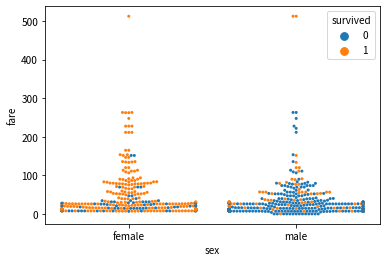

In [106]:
#問題21(3)
sns.swarmplot(data=df,x="sex",y="fare",hue="survived",size=3)
plt.show()


#### ヒント

    sns.swarmplot(data=df,x="sex",y="fare",hue="survived",size=3)

を実行する。

fareが高いほうが生存率は高いようです。

class（客室の等級）とfareは相関が高いので、説明変数としてはどちらか一方でもよいかもしれません。

### 問題22

生存率$p$を計算するモデルを作成する。説明変数でスコア$S$を計算し、生存率$p$にシグモイド関数$\phi()$で変換するロジスティック回帰モデルとする。

$$
S=b_0+b_1 x_1+\cdots+b_p x_p 
$$

$$
p(S)=P(X=1|S)=\phi(S)=\frac{1}{1+\exp(-S)}
$$

ここで$X$は0,1で生存(1)・死亡(0)を表す変数である。






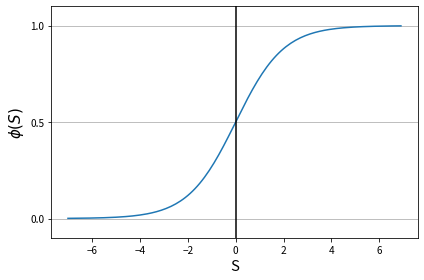

In [107]:
#@title 
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))
S = np.arange(-7, 7, 0.1)
phi_S = sigmoid(S)
plt.plot(S, phi_S)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('S',fontsize=15)
plt.ylabel('$\phi (S)$',fontsize=15)
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

$\phi(S)$は$S$の単調像関数であり、スコア$S$が負の無限大で$p$は0に、正の無限大で$p$は1になるため、確率の定義とも矛盾しない。

問題1から5までの分析をもとにスコア$S$を計算式を考えて回答せよ。
ダミー変数を使う場合は適宜定義すること。

- 例1.SEX=1なら女、SEX=0なら男

- 例2.First calss ならFclass=1,それ以外のクラスならFcLass=0


$$
S=b_0+b_1 \cdot \mbox{SEX}+b_2\cdot \mbox{Fclass}
$$

$$
P(X=1|S)=\mbox{スコアSでの生存確率}=\phi(S)=\frac{1}{1+\exp(-S)}
$$



解答欄

$$
S=b_0+b_1\cdot +b_2\cdot +
$$

